# Composite ID


In [1]:
import sys
sys.path.insert(0, '..')
# sys.path.insert(1, '../python/')
sys.path.insert(1, 'python/')

import ROOT
# import python.l1THistos as histos
import math
import uuid
import pandas as pd

import webpager as wp

from drawingTools import *

# ROOT.enableJSVis()
# ROOT.enableJSVis()

#from drawingTools import *

import awkward as ak
import uproot4 as up
import numpy as np

normalized_histos = list()

Welcome to JupyROOT 6.24/06


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import mplhep as hep

hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS
# Or choose one of the experiment styles
hep.style.use(hep.style.CMS)
# or
hep.style.use("CMS")
plt.style.use(hep.style.CMS)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay

import xgboost as xg
# import shap

In [4]:
ROOT.gROOT.ProcessLine('#include "../src/fastfilling.h"')

0

## Load training and evaluation ntuples

In [5]:
# %load samples.py
import ROOT
import pandas as pd

samples = [
    HistoFile('doubleele_flat1to100_PU200_compid', 'PU200', 'v160A.91E', 'ele', 'electrons 0<p_{T}<100GeV'),
    HistoFile('nugun_alleta_pu200_compid', 'PU200', 'v160A.91E', 'mb', 'Minimum-Bias'),
]






In [6]:
for smp in samples:
    smp.print_primitives()


<HistoFile ../plots/histos_doubleele_flat1to100_PU200_compid_v160A.91E.root, ele>
--- HistoClass: 
['CompTuples', 'CompCatTuples', 'EGHistos', 'HistoSetEff']
--- TPs: 
['TkEleEE']
--- TP selections:
{'TkEleEE': ['all', 'EtaABC', 'Pt15EtaABC', 'EtaBC', 'Pt15EtaBC', 'Pt15']}
--- GEN selections:
{   'TkEleEE': [   'nomatch',
                   'GENPt15EtaBC',
                   'GENEeEtaABC',
                   'GENEtaABC',
                   'GENEe',
                   'GENEePt15',
                   'GEN',
                   'GENEePt15EtaABC',
                   'GENEePt15EtaBC',
                   'GENPt15EtaABC',
                   'GENEtaBC',
                   'GENPt15',
                   'GENEeEtaBC']}
<HistoFile ../plots/histos_nugun_alleta_pu200_compid_v160A.91E.root, mb>
--- HistoClass: 
['CompTuples', 'CompCatTuples', 'EGHistos', 'HistoSetEff']
--- TPs: 
['TkEleEE']
--- TP selections:
{'TkEleEE': ['all', 'EtaABC', 'Pt15EtaABC', 'EtaBC', 'Pt15EtaBC', 'Pt15']}
--- GEN selections

In [7]:
import python.collections as collections
import python.selections as selections
# this is needed to get all the labels defined in cfg modules
import python.plotters_config 
from cfg import *




labels_dict = {}

evm = collections.EventManager()
labels_dict.update(evm.get_labels())
selm = selections.SelectionManager()
labels_dict.update(selm.get_labels())



# #  ==== labels ===============================================
# tp_labels = histo_primitives[['data', 'data_label']].drop_duplicates().set_index('data').T.to_dict('records')[0]
# tp_selection_labels = histo_primitives[['data_sel', 'data_sel_label']].drop_duplicates().set_index('data_sel').T.to_dict('records')[0]
# gen_selection_labels = histo_primitives[['gen_sel', 'gen_sel_label']].drop_duplicates().set_index('gen_sel').T.to_dict('records')[0]





n: GEN, 
	 l:
n: GENEtaBC, 
	 l:1.52 < |#eta^{GEN}| #leq 2.4
n: GENEtaABC, 
	 l:1.49 < |#eta^{GEN}| #leq 2.4
n: GENPt15, 
	 l:p_{T}^{GEN} #geq 15 GeV
n: GENPt15EtaBC, 
	 l:p_{T}^{GEN} #geq 15 GeV, 1.52 < |#eta^{GEN}| #leq 2.4
n: GENPt15EtaABC, 
	 l:p_{T}^{GEN} #geq 15 GeV, 1.49 < |#eta^{GEN}| #leq 2.4
n: GENEe, 
	 l:
n: GENEeEtaBC, 
	 l:1.52 < |#eta^{GEN}| #leq 2.4
n: GENEeEtaABC, 
	 l:1.49 < |#eta^{GEN}| #leq 2.4
n: GENEePt15, 
	 l:p_{T}^{GEN} #geq 15 GeV
n: GENEePt15EtaBC, 
	 l:p_{T}^{GEN} #geq 15 GeV, 1.52 < |#eta^{GEN}| #leq 2.4
n: GENEePt15EtaABC, 
	 l:p_{T}^{GEN} #geq 15 GeV, 1.49 < |#eta^{GEN}| #leq 2.4


In [8]:
# print (labels_dict['GENEeEtaA'])

# print (labels_dict.keys())

In [9]:
%%time

import python.l1THistos as histos

hplot = HPlot(samples, labels_dict)

hplot.create_histo_proxies(histos.CompTuples)
hplot.create_histo_proxies(histos.CompCatTuples)

    
# for tp in tps:
#     hplot.cache_histo(classtype=histos.HistoSetEff, 
#                       samples=samples,
#                       pus=[],
#                       tps=[tp],
#                       tp_sels=histo_primitives[histo_primitives.data == tp].data_sel.unique(),
#                       gen_sels=gen_select[tp])



--- CompTuples
# of plots: 6
# of primitives: 6
--- CompCatTuples
# of plots: 72
# of primitives: 72
--- EGHistos
# of plots: 7200
# of primitives: 72
--- GenParticleHistos
# of plots: 7200
# of primitives: 72
--- CompTuples
# of plots: 6
# of primitives: 6
--- CompCatTuples
# of plots: 54
# of primitives: 54
--- EGHistos
# of plots: 15120
# of primitives: 72
--- GenParticleHistos
# of plots: 15120
# of primitives: 72
--- CompTuples
# of plots: 6
# of primitives: 6
--- CompCatTuples
# of plots: 72
# of primitives: 72
--- EGHistos
# of plots: 7200
# of primitives: 72
--- GenParticleHistos
# of plots: 7200
# of primitives: 72
--- CompTuples
# of plots: 6
# of primitives: 6
--- CompCatTuples
# of plots: 54
# of primitives: 54
--- EGHistos
# of plots: 15120
# of primitives: 72
--- GenParticleHistos
# of plots: 15120
# of primitives: 72
CPU times: user 177 ms, sys: 14.3 ms, total: 191 ms
Wall time: 190 ms


In [10]:
hplot.data

sample     pu       tp      tp_sel       gen_sel   
0      ele  PU200  TkEleEE         all       nomatch  \
1      ele  PU200  TkEleEE      EtaABC       nomatch   
2      ele  PU200  TkEleEE  Pt15EtaABC       nomatch   
3      ele  PU200  TkEleEE       EtaBC       nomatch   
4      ele  PU200  TkEleEE   Pt15EtaBC       nomatch   
..     ...    ...      ...         ...           ...   
133     mb  PU200  TkEleEE   Pt15EtaBC     GENEtaABC   
134     mb  PU200  TkEleEE   Pt15EtaBC         GENEe   
135     mb  PU200  TkEleEE      EtaABC       GENPt15   
136     mb  PU200  TkEleEE  Pt15EtaABC  GENPt15EtaBC   
137     mb  PU200  TkEleEE         all   GENEeEtaABC   

                                    classtype   
0       <class 'python.l1THistos.CompTuples'>  \
1       <class 'python.l1THistos.CompTuples'>   
2       <class 'python.l1THistos.CompTuples'>   
3       <class 'python.l1THistos.CompTuples'>   
4       <class 'python.l1THistos.CompTuples'>   
..                                        ...   
133  <class 'python.l1THistos.CompCatTuples'>   
134  <class 'python.l1THistos.CompCatTuples'>   
135  <class 'python.l1THistos.CompCatTuples'>   
136  <class 'python.l1THistos.CompCatTuples'>   
137  <class 'python.l1THistos.CompCatTuples'>   

                                           histo  
0    <drawingTools.HProxy object at 0x29acbbdf0>  
1    <drawingTools.HProxy object at 0x29c657fa0>  
2    <drawingTools.HProxy object at 0x29c657ee0>  
3    <drawingTools.HProxy object at 0x29acbb910>  
4    <drawingTools.HProxy object at 0x29acbb940>  
..                                           ...  
133  <drawingTools.HProxy object at 0x29c693850>  
134  <drawingTools.HProxy object at 0x29c6938b0>  
135  <drawingTools.HProxy object at 0x29c693910>  
136  <drawingTools.HProxy object at 0x29c693970>  
137  <drawingTools.HProxy object at 0x29c6939d0>  

[138 rows x 7 columns]

In [11]:
hplot.data['sample'].unique()

array(['ele', 'mb'], dtype=object)

In [12]:
hplot.data['tp'].unique()

array(['TkEleEE'], dtype=object)

In [13]:
hsets, labels, text = hplot.get_histo(
    histos.CompCatTuples, 
    'ele', 
    ['PU200'], 
    ['TkEleEE'], 
    ['EtaBC'], ['GENEeEtaBC'], debug=False)

sig_df = ak.to_dataframe(hsets[0].tree.arrays(library='ak'))
sel_sig_df = sig_df[sig_df.gen_dz < 1. ]
sel_sig_df.loc[:, ['cat']] = 'signal'
sel_sig_df

pt       eta       phi  compChi2RZ  compChi2RPhi  compChi2Bend   
entry                                                                      
0      67.50  1.775872  1.003564         0.0           7.0           2.0  \
1      69.25 -1.802052  0.218166         1.0          14.0           1.0   
2      78.50 -2.177298  0.052360         2.0           4.0           0.0   
3      46.50 -1.911136  2.910336         2.0          11.0           0.0   
4      88.25 -2.277655  1.444260         0.0           1.0           0.0   
...      ...       ...       ...         ...           ...           ...   
44882  83.00  2.229658  1.387537         2.0           4.0           2.0   
44883  66.00  2.264565  0.405789         1.0          10.0           2.0   
44884  75.25  1.976585  1.387537         2.0           4.0           0.0   
44885  98.50 -2.378011  2.046399         1.0           0.0           5.0   
44886  35.25  1.802052  2.552544         2.0          12.0           0.0   

       compNstubs       tkPt  compDphi  compDeta   compDpt  compSrrtot   
entry                                                                    
0             6.0  47.105640       0.0       0.0  0.700000    0.210938  \
1             6.0  29.536512       2.0       1.0  0.425993    0.228516   
2             6.0  57.217323       0.0       1.0  0.726115    0.230469   
3             6.0  39.740032       0.0       0.0  0.849462    0.230469   
4             6.0  76.423141       1.0       0.0  0.858357    0.218750   
...           ...        ...       ...       ...       ...         ...   
44882         5.0  32.048412       0.0       0.0  0.385542    0.232422   
44883         4.0   2.662243      21.0       1.0  0.041667    0.240234   
44884         6.0  77.507156       0.0       0.0  1.026578    0.236328   
44885         5.0  49.675041      -1.0      -1.0  0.505076    0.230469   
44886         6.0  11.956793      14.0       0.0  0.615385    0.246094   

       compHoe  compMeanz  compBDTScore     gen_pt   gen_eta   gen_phi   
entry                                                                    
0      0.06250       13.0      3.646484  64.931557  1.797061  0.992015  \
1      0.09375       14.0      2.740234  73.158165 -1.815064  0.211130   
2      0.06250       16.0      3.646484  74.922356 -2.175474  0.044999   
3      0.09375       13.0      3.416016  43.306942 -1.911111  2.915361   
4      0.06250       17.0      3.646484  86.339676 -2.289015  1.442049   
...        ...        ...           ...        ...       ...       ...   
44882  0.06250       17.0      2.964844  85.382042  2.212236  1.396801   
44883  0.09375       14.0      1.449219  67.162354  2.260944  0.409744   
44884  0.09375       17.0      3.662109  85.561394  1.969800  1.396195   
44885  0.06250       14.0      3.646484  94.135109 -2.394671  2.049299   
44886  0.15625       16.0     -0.779297  32.775864  1.796767  2.580387   

         gen_dz     cat  
entry                    
0      0.233172  signal  
1      0.297053  signal  
2      0.048313  signal  
3      0.140724  signal  
4      0.231656  signal  
...         ...     ...  
44882  0.045485  signal  
44883  0.179252  signal  
44884  0.374687  signal  
44885  0.728432  signal  
44886  0.319519  signal  

[42324 rows x 20 columns]

In [14]:
sel_sig_df

pt       eta       phi  compChi2RZ  compChi2RPhi  compChi2Bend   
entry                                                                      
0      67.50  1.775872  1.003564         0.0           7.0           2.0  \
1      69.25 -1.802052  0.218166         1.0          14.0           1.0   
2      78.50 -2.177298  0.052360         2.0           4.0           0.0   
3      46.50 -1.911136  2.910336         2.0          11.0           0.0   
4      88.25 -2.277655  1.444260         0.0           1.0           0.0   
...      ...       ...       ...         ...           ...           ...   
44882  83.00  2.229658  1.387537         2.0           4.0           2.0   
44883  66.00  2.264565  0.405789         1.0          10.0           2.0   
44884  75.25  1.976585  1.387537         2.0           4.0           0.0   
44885  98.50 -2.378011  2.046399         1.0           0.0           5.0   
44886  35.25  1.802052  2.552544         2.0          12.0           0.0   

       compNstubs       tkPt  compDphi  compDeta   compDpt  compSrrtot   
entry                                                                    
0             6.0  47.105640       0.0       0.0  0.700000    0.210938  \
1             6.0  29.536512       2.0       1.0  0.425993    0.228516   
2             6.0  57.217323       0.0       1.0  0.726115    0.230469   
3             6.0  39.740032       0.0       0.0  0.849462    0.230469   
4             6.0  76.423141       1.0       0.0  0.858357    0.218750   
...           ...        ...       ...       ...       ...         ...   
44882         5.0  32.048412       0.0       0.0  0.385542    0.232422   
44883         4.0   2.662243      21.0       1.0  0.041667    0.240234   
44884         6.0  77.507156       0.0       0.0  1.026578    0.236328   
44885         5.0  49.675041      -1.0      -1.0  0.505076    0.230469   
44886         6.0  11.956793      14.0       0.0  0.615385    0.246094   

       compHoe  compMeanz  compBDTScore     gen_pt   gen_eta   gen_phi   
entry                                                                    
0      0.06250       13.0      3.646484  64.931557  1.797061  0.992015  \
1      0.09375       14.0      2.740234  73.158165 -1.815064  0.211130   
2      0.06250       16.0      3.646484  74.922356 -2.175474  0.044999   
3      0.09375       13.0      3.416016  43.306942 -1.911111  2.915361   
4      0.06250       17.0      3.646484  86.339676 -2.289015  1.442049   
...        ...        ...           ...        ...       ...       ...   
44882  0.06250       17.0      2.964844  85.382042  2.212236  1.396801   
44883  0.09375       14.0      1.449219  67.162354  2.260944  0.409744   
44884  0.09375       17.0      3.662109  85.561394  1.969800  1.396195   
44885  0.06250       14.0      3.646484  94.135109 -2.394671  2.049299   
44886  0.15625       16.0     -0.779297  32.775864  1.796767  2.580387   

         gen_dz     cat  
entry                    
0      0.233172  signal  
1      0.297053  signal  
2      0.048313  signal  
3      0.140724  signal  
4      0.231656  signal  
...         ...     ...  
44882  0.045485  signal  
44883  0.179252  signal  
44884  0.374687  signal  
44885  0.728432  signal  
44886  0.319519  signal  

[42324 rows x 20 columns]

In [15]:
hsets, labels, text = hplot.get_histo(
    histos.CompTuples, 
    'mb', 
    ['PU200'], 
    ['TkEleEE'], 
    ['EtaBC'], 'nomatch', debug=False)
bkg_df = ak.to_dataframe(hsets[0].tree.arrays(library='ak'))
bkg_df
bkg_df.loc[:, ['cat']] = 'background'
bkg_df

npt     pt  neta       eta  nphi       phi  ncompChi2RZ   
entry  subentry                                                            
4      0           1   8.50     1  1.832596     1  0.152716            1  \
20     0           1  11.75     1  1.736603     1 -2.718350            1   
23     0           1   6.00     1 -2.234021     1 -1.771509            1   
25     0           1  11.75     1  1.548980     1  0.309796            1   
62     0           1  10.75     1  1.919862     1 -2.465277            1   
...              ...    ...   ...       ...   ...       ...          ...   
200040 0           1  13.00     1 -1.553343     1 -1.784599            1   
200045 0           1   8.50     1  2.286381     1 -1.452987            1   
200052 0           1   8.75     1  1.832596     1  1.121374            1   
200058 0           1  10.75     1  2.255838     1 -2.949606            1   
200074 0           1  14.25     1 -1.544616     1 -1.666789            1   

                 compChi2RZ  ncompChi2RPhi  compChi2RPhi  ...  compDeta   
entry  subentry                                           ...             
4      0                2.0              1           0.0  ...      29.0  \
20     0                0.0              1           0.0  ...      -5.0   
23     0                2.0              1          10.0  ...       2.0   
25     0                2.0              1           0.0  ...      -5.0   
62     0                2.0              1          10.0  ...      -1.0   
...                     ...            ...           ...  ...       ...   
200040 0                2.0              1           7.0  ...     -17.0   
200045 0                1.0              1           0.0  ...      -6.0   
200052 0                0.0              1           2.0  ...      -3.0   
200058 0                0.0              1           9.0  ...       0.0   
200074 0                1.0              1          11.0  ...       5.0   

                 ncompDpt   compDpt  ncompSrrtot  compSrrtot  ncompHoe   
entry  subentry                                                          
4      0                1  0.470588            1    0.220703         1  \
20     0                1  0.319149            1    0.230469         1   
23     0                1  1.083333            1    0.298828         1   
25     0                1  0.872340            1    0.193359         1   
62     0                1  0.209302            1    0.304688         1   
...                   ...       ...          ...         ...       ...   
200040 0                1  0.288462            1    0.191406         1   
200045 0                1  0.235294            1    0.273438         1   
200052 0                1  1.057143            1    0.259766         1   
200058 0                1  0.232558            1    0.281250         1   
200074 0                1  0.438596            1    0.216797         1   

                 compHoe  ncompMeanz  compMeanz         cat  
entry  subentry                                              
4      0         0.31250           1       12.0  background  
20     0         0.21875           1       13.0  background  
23     0         0.37500           1       11.0  background  
25     0         0.21875           1       15.0  background  
62     0         0.25000           1       14.0  background  
...                  ...         ...        ...         ...  
200040 0         0.25000           1       14.0  background  
200045 0         0.34375           1       12.0  background  
200052 0         0.37500           1       16.0  background  
200058 0         0.21875           1       14.0  background  
200074 0         0.28125           1       15.0  background  

[25670 rows x 29 columns]

In [16]:
def print_cat_population(df):
    tot = df.shape[0]
    sig_count = df[df.cat == 'signal'].shape[0]
    bkg_count = df[df.cat == 'background'].shape[0]
    print(f'Total: {tot}: sig: {sig_count}({sig_count*100/tot}%), bkg: {bkg_count}({bkg_count*100/tot}%)')

In [17]:
print_cat_population(sel_sig_df)

Total: 42324: sig: 42324(100.0%), bkg: 0(0.0%)


In [18]:
print_cat_population(bkg_df)

Total: 25670: sig: 0(0.0%), bkg: 25670(100.0%)


In [19]:
sb_df = pd.concat([sel_sig_df, bkg_df], ignore_index=True)
sb_df.columns

Index(['pt', 'eta', 'phi', 'compChi2RZ', 'compChi2RPhi', 'compChi2Bend',
       'compNstubs', 'tkPt', 'compDphi', 'compDeta', 'compDpt', 'compSrrtot',
       'compHoe', 'compMeanz', 'compBDTScore', 'gen_pt', 'gen_eta', 'gen_phi',
       'gen_dz', 'cat', 'npt', 'neta', 'nphi', 'ncompChi2RZ', 'ncompChi2RPhi',
       'ncompChi2Bend', 'ncompNstubs', 'ntkPt', 'ncompDphi', 'ncompDeta',
       'ncompDpt', 'ncompSrrtot', 'ncompHoe', 'ncompMeanz'],
      dtype='object')

In [20]:
print_cat_population(sb_df)

Total: 67994: sig: 42324(62.24666882371974%), bkg: 25670(37.75333117628026%)


### Load original dataset 

This is the CMSSW 12.5.X dataset used for the original implementation.
These data have already been selected using the eta, pt and dz cuts.

In [21]:
s_upfile = up.open('../plots/histos_ele_flat2to100_PU200_HLTTDR_tkE_eg_v230331_floattohw.3high_1p5eta2p7_BDT.root')
b_upfile = up.open('../plots/histos_minbias_PU200_HLTTDR_tkE_eg_v230331_floattohw.3high_1p5eta2p7_BDT.root')

In [22]:
s_upfile.keys()

['sig_train;1', 'sig_test;1']

In [23]:
b_upfile.keys()

['bkg_train;1', 'bkg_test;1']

In [24]:
pm_sig_train_df = ak.to_dataframe(s_upfile['sig_train'].arrays(library='ak'))
pm_sig_train_df['cat'] = 'signal'
pm_sig_train_df


pt       eta       phi  hwQual      tkChi2       tkpt      tkz0   
entry                                                                       
0      67.50  1.775872  1.003564     3.0   18.748457  47.105640 -8.203125  \
1      65.50 -1.823869 -2.159845     3.0    3.397507  50.594948 -8.789062   
2      69.25 -1.802052  0.218166     3.0  378.120117  29.536512  4.570312   
3      70.25  1.828232 -2.936517     3.0    7.030618  80.356682  4.863281   
4      29.00 -1.535890  0.933751     3.0   10.075571  46.903473 -6.738281   
...      ...       ...       ...     ...         ...        ...       ...   
34326  51.00  1.527163  1.684243     3.0   19.649437  75.892426 -2.636719   
34327  47.75 -1.745329 -2.495821     3.0   11.502119  40.178341  7.500000   
34328  38.50  1.793326  0.597775     3.0   23.438198  17.049156  7.500000   
34329  72.00  2.177298 -0.728675     3.0   10.039360  13.992969  3.632812   
34330  78.00 -2.155482  2.408554     3.0  290.008820  24.558447  3.398438   

           hoe    srrtot  deta  dphi       dpt  meanz  nstubs  chi2rphi   
entry                                                                     
0      0.06250  0.210938   0.0   0.0  0.700000   13.0     6.0       7.0  \
1      0.06250  0.214844   1.0   0.0  0.767176   14.0     6.0       0.0   
2      0.09375  0.228516   1.0   2.0  0.425993   14.0     6.0      14.0   
3      0.06250  0.232422   0.0  -1.0  1.142349   15.0     5.0       2.0   
4      0.12500  0.224609   2.0   2.0  1.612069    9.0     6.0       1.0   
...        ...       ...   ...   ...       ...    ...     ...       ...   
34326  0.06250  0.226562  -1.0   0.0  1.485294   10.0     6.0       5.0   
34327  0.12500  0.230469   1.0   0.0  0.837696   13.0     6.0       1.0   
34328  0.09375  0.234375  -1.0  -1.0  0.441558   13.0     6.0       7.0   
34329  0.06250  0.232422  -1.0  -6.0  0.194444   15.0     6.0       1.0   
34330  0.06250  0.236328   0.0  -2.0  0.314103   14.0     6.0      14.0   

       chi2rz  ch2bend     cat  
entry                           
0         0.0      2.0  signal  
1         0.0      1.0  signal  
2         1.0      1.0  signal  
3         1.0      6.0  signal  
4         2.0      4.0  signal  
...       ...      ...     ...  
34326     3.0      2.0  signal  
34327     3.0      0.0  signal  
34328     1.0      3.0  signal  
34329     2.0      5.0  signal  
34330     1.0      3.0  signal  

[34331 rows x 18 columns]

In [25]:
pm_bkg_train_df = ak.to_dataframe(b_upfile['bkg_train'].arrays(library='ak'))
pm_bkg_train_df['cat'] = 'background'
pm_bkg_train_df

pt       eta       phi  hwQual      tkChi2       tkpt       tkz0   
entry                                                                        
0      16.50  1.557706 -0.104720     3.0  205.890152   6.266347  -3.632812  \
1      16.50  1.675516 -2.072578     1.0    3.710195  12.035803  -1.699219   
2      29.75  1.570796 -2.871067     1.0    4.389359   2.369581   3.105469   
3      22.75 -2.356194  0.484329     1.0    1.837475   3.616317 -11.015625   
4      16.25  2.138028 -1.234820     0.0    2.208161   3.064641  -3.339844   
...      ...       ...       ...     ...         ...        ...        ...   
2212   27.25  1.644973 -3.049963     1.0   14.060205   6.992008  -1.992188   
2213   20.25 -2.234021  0.126536     1.0    3.427429   8.680308   1.230469   
2214   20.50  2.120575  2.740167     0.0   11.422426  27.597244   3.925781   
2215   17.00 -1.937315  1.850049     1.0   12.485431   4.312750   1.464844   
2216   15.75  1.688606 -2.919063     0.0    6.480888   2.526823   0.644531   

           hoe    srrtot  deta  dphi       dpt  meanz  nstubs  chi2rphi   
entry                                                                     
0      0.18750  0.224609   1.0 -16.0  0.378788   13.0     5.0      14.0  \
1      0.18750  0.265625  10.0   4.0  0.727273   10.0     4.0       0.0   
2      0.18750  0.218750 -14.0  -9.0  0.075630   14.0     6.0       0.0   
3      0.18750  0.240234   1.0 -13.0  0.153846   15.0     4.0       0.0   
4      0.31250  0.279297  13.0  -3.0  0.184615   18.0     6.0       0.0   
...        ...       ...   ...   ...       ...    ...     ...       ...   
2212   0.21875  0.224609  -1.0  22.0  0.491228   12.0     6.0       4.0   
2213   0.90625  0.263672  -5.0   6.0  0.432099   26.0     6.0       0.0   
2214   1.15625  0.279297   1.0  -3.0  1.341463   34.0     6.0       2.0   
2215   0.25000  0.224609  -1.0  44.0  0.250000   14.0     6.0       4.0   
2216   0.18750  0.302734  27.0 -19.0  0.158730   12.0     6.0       0.0   

       chi2rz  ch2bend         cat  
entry                               
0         1.0      3.0  background  
1         2.0      0.0  background  
2         1.0      1.0  background  
3         1.0      0.0  background  
4         0.0      5.0  background  
...       ...      ...         ...  
2212      1.0      0.0  background  
2213      1.0      3.0  background  
2214      2.0      0.0  background  
2215      0.0      0.0  background  
2216      2.0      0.0  background  

[2217 rows x 18 columns]

In [26]:
pm_global_train_df = pd.concat([pm_sig_train_df, pm_bkg_train_df], ignore_index=True)

In [27]:
print_cat_population(pm_global_train_df)

Total: 36548: sig: 34331(93.93400459669476%), bkg: 2217(6.065995403305243%)


In [28]:
sb_df.columns

Index(['pt', 'eta', 'phi', 'compChi2RZ', 'compChi2RPhi', 'compChi2Bend',
       'compNstubs', 'tkPt', 'compDphi', 'compDeta', 'compDpt', 'compSrrtot',
       'compHoe', 'compMeanz', 'compBDTScore', 'gen_pt', 'gen_eta', 'gen_phi',
       'gen_dz', 'cat', 'npt', 'neta', 'nphi', 'ncompChi2RZ', 'ncompChi2RPhi',
       'ncompChi2Bend', 'ncompNstubs', 'ntkPt', 'ncompDphi', 'ncompDeta',
       'ncompDpt', 'ncompSrrtot', 'ncompHoe', 'ncompMeanz'],
      dtype='object')

In [29]:
print(sb_df.shape)

(67994, 34)


In [30]:
col_name_map = {
    'tkPt': 'tkpt',
    'compHoe': 'hoe',
    'compSrrtot': 'srrtot',
    'compDeta': 'deta',
    'compDphi': 'dphi',
    'compDpt': 'dpt',
    'compMeanz': 'meanz',
    'compNstubs': 'nstubs',
    'compChi2RPhi': 'chi2rphi',
    'compChi2RZ': 'chi2rz',
    'compChi2Bend': 'ch2bend',
}
global_df = sb_df.rename(columns=col_name_map)
print(global_df.shape)



(67994, 34)


In [31]:
global_df

pt       eta       phi  chi2rz  chi2rphi  ch2bend  nstubs   
0      67.50  1.775872  1.003564     0.0       7.0      2.0     6.0  \
1      69.25 -1.802052  0.218166     1.0      14.0      1.0     6.0   
2      78.50 -2.177298  0.052360     2.0       4.0      0.0     6.0   
3      46.50 -1.911136  2.910336     2.0      11.0      0.0     6.0   
4      88.25 -2.277655  1.444260     0.0       1.0      0.0     6.0   
...      ...       ...       ...     ...       ...      ...     ...   
67989  13.00 -1.553343 -1.784599     2.0       7.0      2.0     5.0   
67990   8.50  2.286381 -1.452987     1.0       0.0      0.0     6.0   
67991   8.75  1.832596  1.121374     0.0       2.0      0.0     6.0   
67992  10.75  2.255838 -2.949606     0.0       9.0      3.0     6.0   
67993  14.25 -1.544616 -1.666789     1.0      11.0      6.0     6.0   

            tkpt  dphi  deta  ...  ncompChi2RPhi  ncompChi2Bend  ncompNstubs   
0      47.105640   0.0   0.0  ...            NaN            NaN          NaN  \
1      29.536512   2.0   1.0  ...            NaN            NaN          NaN   
2      57.217323   0.0   1.0  ...            NaN            NaN          NaN   
3      39.740032   0.0   0.0  ...            NaN            NaN          NaN   
4      76.423141   1.0   0.0  ...            NaN            NaN          NaN   
...          ...   ...   ...  ...            ...            ...          ...   
67989   3.734965 -33.0 -17.0  ...            1.0            1.0          1.0   
67990   2.077268  -3.0  -6.0  ...            1.0            1.0          1.0   
67991   9.137548   1.0  -3.0  ...            1.0            1.0          1.0   
67992   2.553987  30.0   0.0  ...            1.0            1.0          1.0   
67993   6.353784 -42.0   5.0  ...            1.0            1.0          1.0   

       ntkPt  ncompDphi  ncompDeta  ncompDpt  ncompSrrtot  ncompHoe ncompMeanz  
0        NaN        NaN        NaN       NaN          NaN       NaN        NaN  
1        NaN        NaN        NaN       NaN          NaN       NaN        NaN  
2        NaN        NaN        NaN       NaN          NaN       NaN        NaN  
3        NaN        NaN        NaN       NaN          NaN       NaN        NaN  
4        NaN        NaN        NaN       NaN          NaN       NaN        NaN  
...      ...        ...        ...       ...          ...       ...        ...  
67989    1.0        1.0        1.0       1.0          1.0       1.0        1.0  
67990    1.0        1.0        1.0       1.0          1.0       1.0        1.0  
67991    1.0        1.0        1.0       1.0          1.0       1.0        1.0  
67992    1.0        1.0        1.0       1.0          1.0       1.0        1.0  
67993    1.0        1.0        1.0       1.0          1.0       1.0        1.0  

[67994 rows x 34 columns]

In [32]:
print_cat_population(global_df)

Total: 67994: sig: 42324(62.24666882371974%), bkg: 25670(37.75333117628026%)


In [33]:
pt_regions = {'high': 'pt>=15', 'low': '5<=pt<15'}
eta_regions = {'high': '2.7<=abs(eta)<3.0', 'low': '1.5<=abs(eta)<2.7'}

pt_reg = 'high'
eta_reg = 'low'


query_cut = f'({pt_regions[pt_reg]}) & ({eta_regions[eta_reg]})'

In [34]:
print(query_cut)

(pt>=15) & (1.5<=abs(eta)<2.7)


In [35]:
label_encoder = LabelEncoder()

global_df.loc[:, 'encoded_class'] = label_encoder.fit_transform( global_df['cat'].values )


In [36]:
sel_global_df = global_df.query(query_cut)
print_cat_population(sel_global_df)


Total: 42210: sig: 39731(94.12698412698413%), bkg: 2479(5.873015873015873%)


In [37]:
print_cat_population(pm_global_train_df)

Total: 36548: sig: 34331(93.93400459669476%), bkg: 2217(6.065995403305243%)


In [38]:
pm_global_train_df.loc[:, 'encoded_class'] = label_encoder.fit_transform( pm_global_train_df['cat'].values )

In [39]:
print_cat_population(pm_global_train_df)

Total: 36548: sig: 34331(93.93400459669476%), bkg: 2217(6.065995403305243%)


## Plot the input features


In [40]:
# Input variables to BDT for different configs. Specify config in options. To try new BDT with different inputs variables, then add another key to dict
bdt_vars = {"basic":['coreshowerlength','firstlayer','maxlayer','srrmean'],
             'baseline':['coreshowerlength','showerlength','firstlayer','maxlayer','szz','srrmean','srrtot','seetot','spptot'],
             'allvars':    ['coreshowerlength','showerlength','firstlayer','maxlayer','szz','srrmean','srrtot','seetot','spptot', 'seemax', 'sppmax', 'srrmax', 'meanz', 'emaxe', 'layer10', 'layer50', 'layer90', 'ntc67', 'ntc90', 'hoe'],
             'allvars_trk':['coreshowerlength','showerlength','firstlayer','maxlayer','szz','srrmean','srrtot','seetot','spptot', 'seemax', 'sppmax', 'srrmax', 'meanz', 'emaxe', 'layer10', 'layer50', 'layer90', 'ntc67', 'ntc90', 'hoe','tkchi2','tkz0','tknstubs','tkpt','dphi','deta'],
             'allvars_trk2':['coreshowerlength','showerlength','firstlayer','maxlayer','szz','srrmean','srrtot','seetot','spptot', 'seemax', 'sppmax', 'srrmax', 'meanz', 'emaxe', 'layer10', 'layer50', 'layer90', 'ntc67', 'ntc90', 'hoe','tkchi2','tkz0','tknstubs','tkpt','dphi','deta','dpt'],
             'best9_loweta': ['hoe', 'srrtot', 'firstlayer', 'ntc67', 'ntc90', 'layer50','seetot', 'layer10', 'emaxe'],
             'best9_higheta':['hoe', 'ntc67', 'srrtot', 'spptot', 'ntc90', 'emaxe', 'layer90', 'szz', 'layer50'],
             'best9_loweta_lowpt': ['layer90', 'hoe', 'srrtot', 'ntc67', 'ntc90', 'coreshowerlength','seetot', 'layer50', 'spptot'],
             'best9_higheta_lowpt':['seetot', 'layer90', 'meanz', 'hoe', 'ntc90', 'ntc67','spptot', 'layer10', 'emaxe'], 
             'allvars_red':['coreshowerlength','showerlength','firstlayer','maxlayer','szz','srrmean','srrtot','seetot','spptot', 'meanz', 'layer10', 'layer50', 'layer90', 'ntc67', 'ntc90'],
             'allvars_trk2_best9': ['tkpt','srrtot','dpt','hoe','ntc67','deta','tkchi2','dphi','layer50'],
             'best9_loweta_red': ['srrtot', 'ntc67', 'ntc90', 'hoe', 'seetot', 'coreshowerlength','srrmean', 'srrmax', 'emaxe'],
             'best9_higheta_red':['ntc67', 'ntc90', 'srrtot', 'hoe', 'spptot', 'sppmax', 'seetot', 'emaxe', 'layer10'],
             'allAvailVars':               ['hoe','tkpt','srrtot','deta','dpt','meanz','dphi','tkchi2','spptot','tkz0','seetot','showerlength','coreshowerlength','firstlayer','szz','tknstubs'],
             'allAvailVars_best3cl_alltrk':['hoe','tkpt','srrtot','deta','dpt','meanz','dphi','tkchi2','tkz0','tknstubs'],
             'allAvailVars_best3cl_alltrk2':['hoe','tkpt','srrtot','deta'],
             'allAvailVars_best3cl_alltrk_lowpt':['coreshowerlength','tkpt','srrtot','deta','dpt','meanz','dphi','tkchi2','tkz0','tknstubs'],
             'allAvailVars_best3cl_alltrk_lowpt2':['coreshowerlength','hoe','tkpt','srrtot','deta','dpt','meanz','dphi','tkchi2','tkz0','tknstubs'],
             'emulator':['tkChi2','tkpt','tkz0','hoe','srrtot','deta','dphi','dpt','meanz','nstubs','chi2rphi','chi2rz','ch2bend'],
             'emulator2':['tkpt','hoe','srrtot','deta','dphi','dpt','meanz','nstubs','chi2rphi','chi2rz','ch2bend'],
             'emulator_allpt':['tkpt','hoe','srrtot','deta','dphi','dpt','meanz','nstubs','chi2rphi','chi2rz','ch2bend'],
             'emulator_12p5':['tkpt','hoe','srrtot','deta','dphi','dpt','meanz','nstubs','chi2rphi','chi2rz','ch2bend'],
            }

variables = bdt_vars['emulator_12p5']

In [41]:
hep.style.CMS
# hep.style.CMS['figure.figsize'] = (10.0, 10.0)
hep.style.CMS['font.size'] = 20


In [42]:
import copy

In [43]:
violin_style = copy.copy(hep.style.CMS)
violin_style['figure.figsize'] = (20.0, 15.0)
violin_style['font.size'] = 20
plt.style.use(violin_style)

In [44]:
hep.style.CMS


{'font.sans-serif': ['TeX Gyre Heros', 'Helvetica', 'Arial'],
 'font.family': 'sans-serif',
 'mathtext.fontset': 'custom',
 'mathtext.rm': 'TeX Gyre Heros',
 'mathtext.bf': 'TeX Gyre Heros:bold',
 'mathtext.sf': 'TeX Gyre Heros',
 'mathtext.it': 'TeX Gyre Heros:italic',
 'mathtext.tt': 'TeX Gyre Heros',
 'mathtext.cal': 'TeX Gyre Heros',
 'mathtext.default': 'regular',
 'figure.figsize': (10.0, 10.0),
 'font.size': 20,
 'axes.labelsize': 'medium',
 'axes.unicode_minus': False,
 'xtick.labelsize': 'small',
 'ytick.labelsize': 'small',
 'legend.fontsize': 'small',
 'legend.handlelength': 1.5,
 'legend.borderpad': 0.5,
 'legend.frameon': False,
 'xtick.direction': 'in',
 'xtick.major.size': 12,
 'xtick.minor.size': 6,
 'xtick.major.pad': 6,
 'xtick.top': True,
 'xtick.major.top': True,
 'xtick.major.bottom': True,
 'xtick.minor.top': True,
 'xtick.minor.bottom': True,
 'xtick.minor.visible': True,
 'ytick.direction': 'in',
 'ytick.major.size': 12,
 'ytick.minor.size': 6.0,
 'ytick.right':

In [45]:
sb_df.loc[:, ['a.u.']] = ''


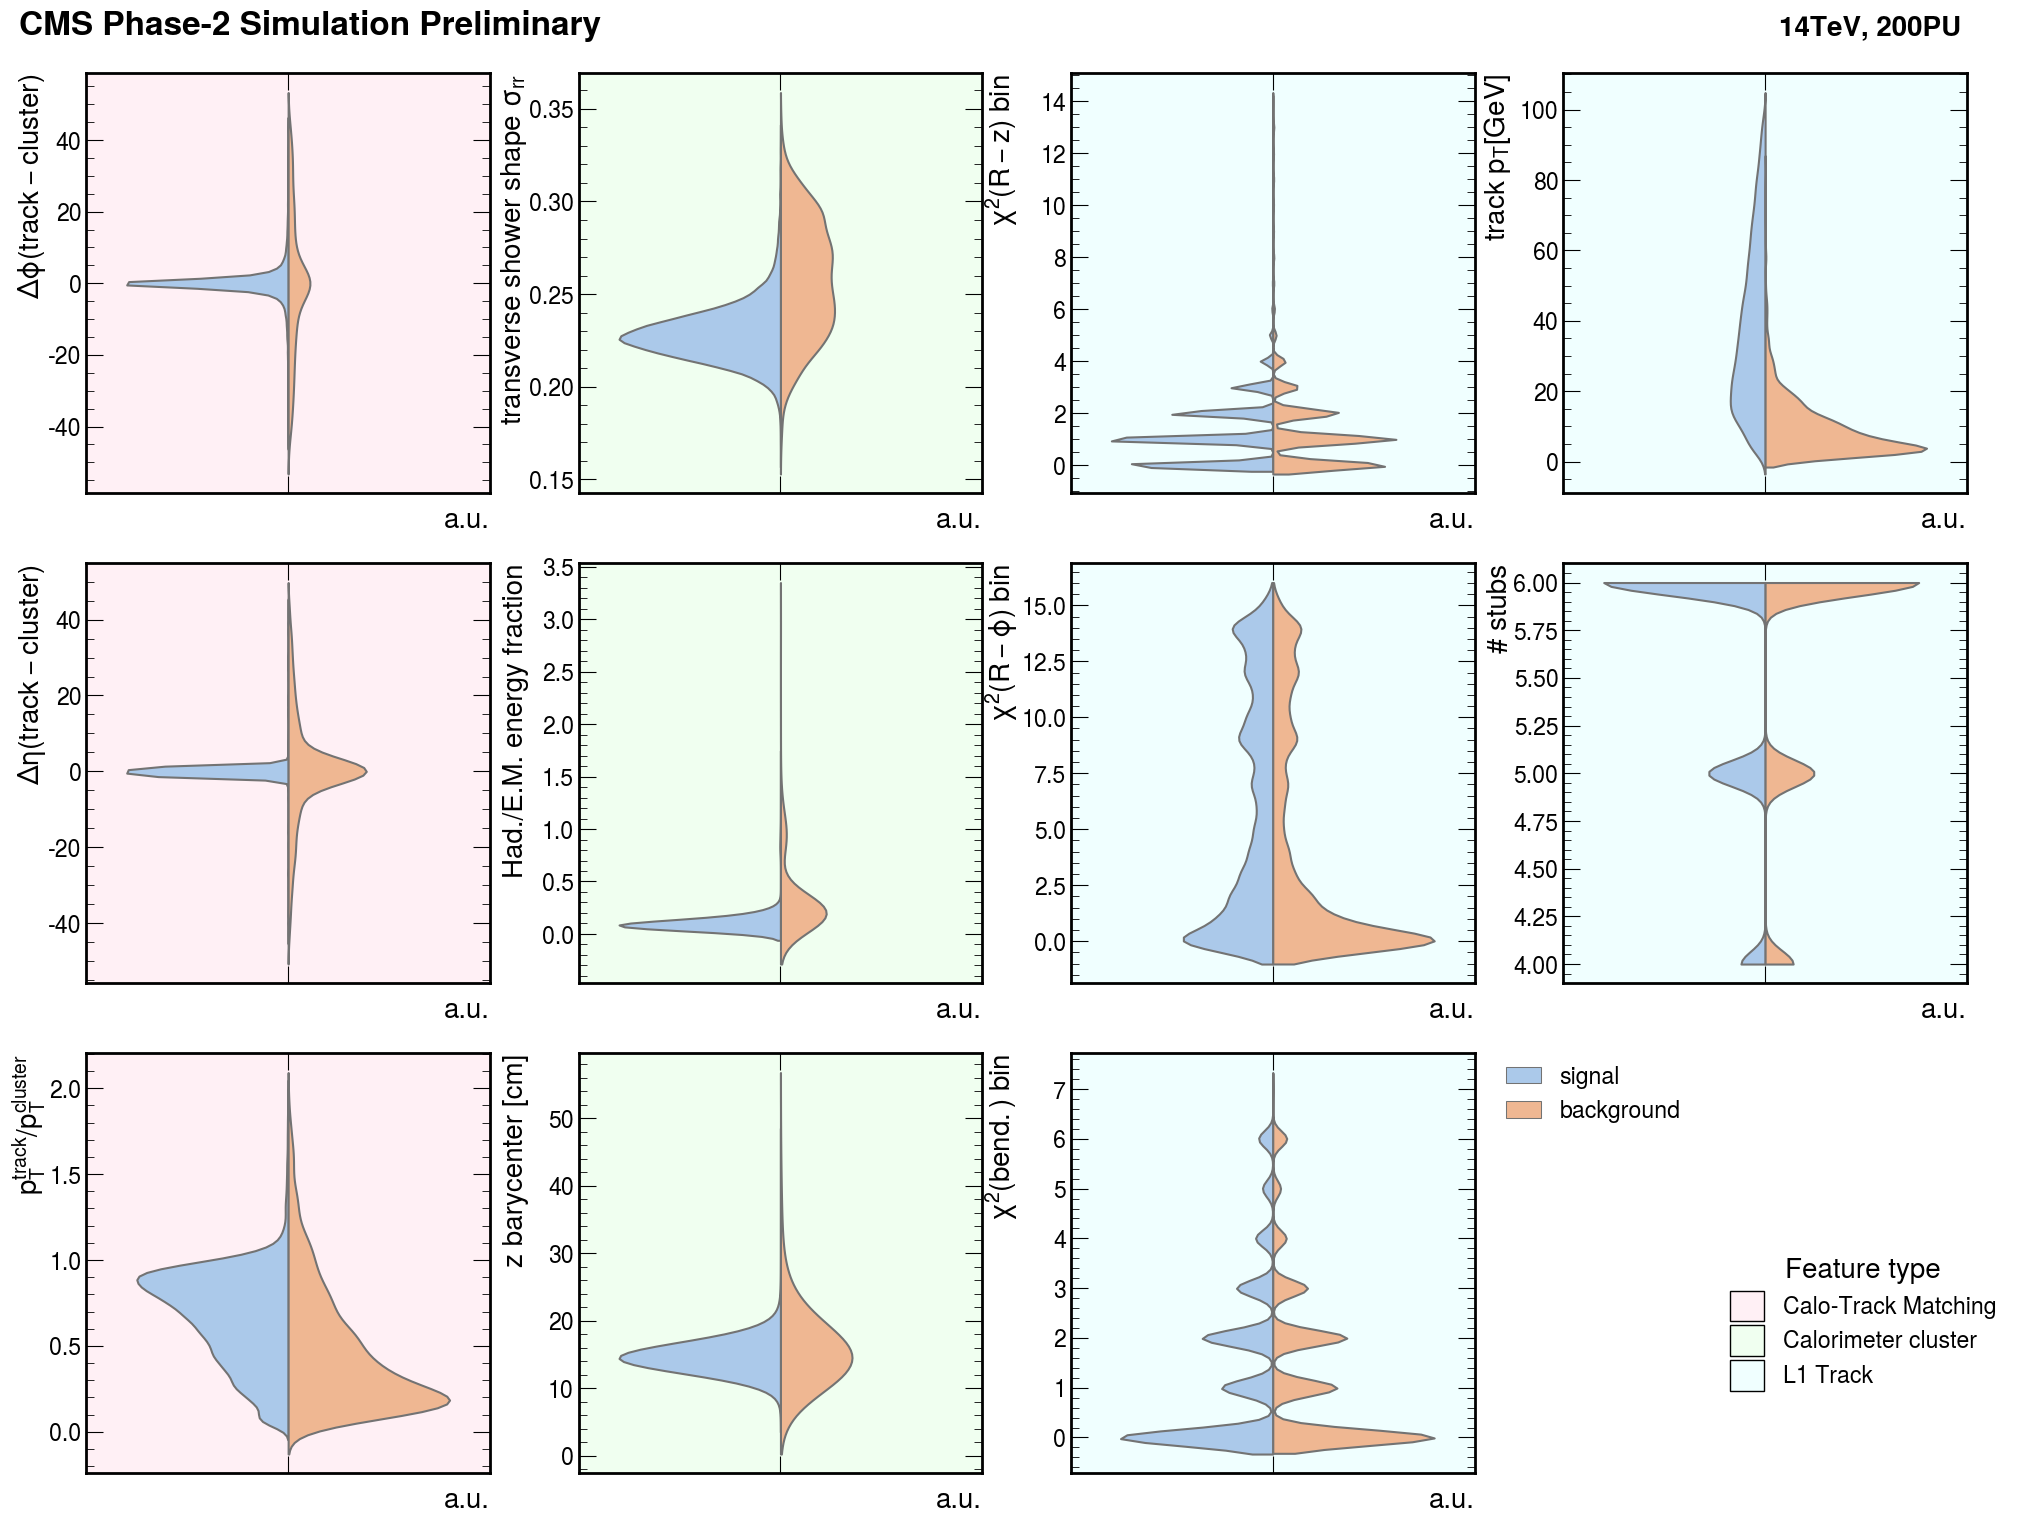

In [48]:
from matplotlib.patches import Patch
fig, axs = plt.subplots(3, 4, sharex=False, sharey=False, 
#                         constrained_layout=True
                       )
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.22, hspace=None)
# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

inner = 'stick'
inner = None

# high pT bin!
df = sb_df[sb_df.pt > 15]


tk_col = 'azure'
cl_col = 'honeydew'
tc_col = 'lavenderblush'

g = sns.violinplot(ax=axs[0, 0], data=df, x='a.u.', y="compDphi", hue="cat", split=True, 
                   palette="pastel", inner=inner)
g.set_ylabel(r'$\Delta\phi(track-cluster)$',labelpad=0)
g.legend([], [], frameon=False)
g.set_facecolor(tc_col)

g = sns.violinplot(ax=axs[1, 0], data=df, x='a.u.', y="compDeta", hue="cat", split=True, palette="pastel", inner=inner)
g.set_ylabel(r'$\Delta\eta(track-cluster)$',labelpad=0)
g.legend([], [], frameon=False)
g.set_facecolor(tc_col)

g = sns.violinplot(ax=axs[2, 0], data=df[df.compDpt<2], x='a.u.', y="compDpt", hue="cat", split=True, palette="pastel", inner=inner)
g.set_ylabel(r'$p_{T}^{track}/p_{T}^{cluster}$',labelpad=0)
g.legend([], [], frameon=False)
g.set_facecolor(tc_col)



g = sns.violinplot(ax=axs[0, 1], data=df, x='a.u.', y="compSrrtot", hue="cat", split=True, palette="pastel", inner=inner)
g.set_ylabel(r'transverse shower shape $\sigma_{rr}$',labelpad=0)
g.legend([], [], frameon=False)
g.set_facecolor(cl_col)

g = sns.violinplot(ax=axs[1, 1], data=df, x='a.u.', y="compHoe", hue="cat", split=True,bw=0.6, palette="pastel", inner=inner)
g.set_ylabel(r'Had./E.M. energy fraction',labelpad=0)
g.legend([], [], frameon=False)
g.set_facecolor(cl_col)

g = sns.violinplot(ax=axs[2, 1], data=df, x='a.u.', y="compMeanz", hue="cat", bw=1, split=True, palette="pastel", inner=inner)
g.set_ylabel(r'z barycenter [cm]',labelpad=0)
g.legend([], [], frameon=False)
g.set_facecolor(cl_col)

g = sns.violinplot(ax=axs[0, 2], data=df, x='a.u.', y="compChi2RZ", hue="cat",bw=0.1, split=True, palette="pastel", inner=inner)
g.set_ylabel(r'$\chi^2(R-z)$ bin',labelpad=0)
g.legend([], [], frameon=False)
g.set_facecolor(tk_col)

g = sns.violinplot(ax=axs[1, 2], data=df, x='a.u.', y="compChi2RPhi", hue="cat",bw=0.1, split=True, palette="pastel", inner=inner)
g.set_ylabel(r'$\chi^2(R-\phi)$ bin',labelpad=0)
g.legend([], [], frameon=False)
g.set_facecolor(tk_col)

g = sns.violinplot(ax=axs[2, 2], data=df, x='a.u.', y="compChi2Bend", hue="cat",bw=0.1, split=True, palette="pastel", inner=inner)
g.set_ylabel(r'$\chi^2(bend.)$ bin',labelpad=0)
g.legend([], [], frameon=False)
g.set_facecolor(tk_col)
g.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

g = sns.violinplot(ax=axs[0, 3], data=df[df.tkPt<100], x='a.u.', y="tkPt", hue="cat", split=True, palette="pastel", inner=inner)
g.set_ylabel(r'track $p_{T}$[GeV]',labelpad=0)
g.legend([], [], frameon=False)
g.set_facecolor(tk_col)

g = sns.violinplot(ax=axs[1, 3], data=df, x='a.u.', y="compNstubs", hue="cat", split=True,bw=0.1,  cut=0, palette="pastel", inner=inner)
g.set_ylabel(r'# stubs',labelpad=0)
g.set_facecolor(tk_col)
g.legend([], [], frameon=False)

# g.legend([], [], frameon=False)

axs[2, 3].remove()


# print(g)
# sns.barplot(ax=axs[0, 0], x=tips.index, y=tips.total_bill)
# axs[0, 0].set_title("tip")
# print(axs[0, 0])



fig.align_labels() 
# labelcolor=['lavenderblush', 'azure'],
legend_elements = [
    Patch(facecolor=tc_col,                           
          edgecolor='k',
          label='Calo-Track Matching'),
    Patch(facecolor=cl_col,                           
          edgecolor='k',
          label='Calorimeter cluster'),
    Patch(facecolor=tk_col,                           
          edgecolor='k',
          label='L1 Track'),    
                  ]

leg = fig.legend(handles=legend_elements, bbox_to_anchor=(1, 0.2),
          bbox_transform=fig.transFigure, title='Feature type')

for patch in leg.get_patches():
    patch.set_height(22)
    patch.set_y(-6)

fig.text(0, 1, 'CMS Phase-2 Simulation Preliminary',fontsize='large', weight='bold')
fig.text(0.88, 1, '14TeV, 200PU',figure=fig, weight='bold')

fig.savefig('CompID_BDT_Features.pdf', bbox_inches='tight')
fig.savefig('CompID_BDT_Features.png', bbox_inches='tight')

# fig.savefig('CompID_BDT_Features.png')

# plt.text(0, 1, 'CMS Preliminary Simulation',figure=fig) 
# fig.legend(['lavenderblush', 'azure'], labels=['signal', 'background'],loc='lower right' )
# plt.legend(labelcolor[l1, l2, l3],["HHZ 1", "HHN", "HHE"])

In [47]:
np.max(df.tkPt)

10928.509

In [48]:
variables

['tkpt',
 'hoe',
 'srrtot',
 'deta',
 'dphi',
 'dpt',
 'meanz',
 'nstubs',
 'chi2rphi',
 'chi2rz',
 'ch2bend']

In [104]:
class HistFeatures(object):
    def __init__(self, name):
        self.h_tkpt   = ROOT.TH1F(f'h_tkpt_{name}', 'h_tkpt; track p_{T} [GeV]', 10, 0, 100)
        self.h_hoe    = ROOT.TH1F(f'h_hoe_{name}', 'h_hoe; Had./E.M. energy fraction', 50, 0, 3)
        self.h_srrtot = ROOT.TH1F(f'h_srrtot_{name}', 'h_srrtot; transverse shower shape #sigma_{rr}', 50, 0.1, 0.4)
        self.h_deta = ROOT.TH1F(f'h_deta_{name}', 'h_deta; #Delta#eta (track-cluster)', 50, -50, 50) 
        self.h_dphi = ROOT.TH1F(f'h_dphi_{name}', 'h_dphi; #Delta#phi (track-cluster)', 50, -50, 50)
        self.h_dpt = ROOT.TH1F(f'h_dpt_{name}', 'h_dpt; p_{T}^{track}/p_{T}^{cluster}', 50, 0, 2)
        self.h_meanz = ROOT.TH1F(f'h_meanz_{name}', 'h_meanz; z barycenter [cm]', 50, 0, 50)
        self.h_nstubs = ROOT.TH1F(f'h_nstubs_{name}', 'h_nstubs; # stubs', 10, 0, 10)
        self.h_chi2rphi = ROOT.TH1F(f'h_chi2rphi_{name}', 'h_chi2rphi; #chi^{2}(R-#phi) bin', 20, 0, 20)
        self.h_chi2rz = ROOT.TH1F(f'h_chi2rz_{name}', 'h_chi2rz; #chi^{2}(R-z) bin', 20, 0, 20)
        self.h_ch2bend = ROOT.TH1F(f'h_ch2bend_{name}', 'h_ch2bend; #chi^{2}(bend) bin', 20, 0, 20)
        
    def fill(self, data):
        ROOT.fill_1Dhist(self.h_tkpt, data.tkpt.values)
        ROOT.fill_1Dhist(self.h_hoe, data.hoe.values)
        ROOT.fill_1Dhist(self.h_srrtot, data.srrtot.values)
        ROOT.fill_1Dhist(self.h_deta, data.deta.values)
        ROOT.fill_1Dhist(self.h_dphi, data.dphi.values)
        ROOT.fill_1Dhist(self.h_dpt, data.dpt.values)
        ROOT.fill_1Dhist(self.h_meanz, data.meanz.values)
        ROOT.fill_1Dhist(self.h_nstubs, data.nstubs.values)
        ROOT.fill_1Dhist(self.h_chi2rphi, data.chi2rphi.values)
        ROOT.fill_1Dhist(self.h_chi2rz, data.chi2rz.values)
        ROOT.fill_1Dhist(self.h_ch2bend, data.ch2bend.values)
        

In [105]:
h_feat_sig = HistFeatures('sig')
h_feat_bkg = HistFeatures('bkg')

h_feat_sig_pm = HistFeatures('sigpm')
h_feat_bkg_pm = HistFeatures('bkgpm')


Warning in <TFile::Append>: Replacing existing TH1: h_tkpt_sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_hoe_sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_srrtot_sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_deta_sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_dphi_sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_dpt_sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_meanz_sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_nstubs_sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_chi2rphi_sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_chi2rz_sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_ch2bend_sig (Potential memory leak).
Warning in <TFile::A

In [106]:
h_feat_sig.fill(sel_global_df[sel_global_df.cat == "signal"])
h_feat_bkg.fill(sel_global_df[sel_global_df.cat == "background"])

h_feat_sig_pm.fill(pm_global_train_df[pm_global_train_df.cat == "signal"])
h_feat_bkg_pm.fill(pm_global_train_df[pm_global_train_df.cat == "background"])

In [107]:

def draw_feature(h1, h2, idx, c, frame_color=None, y_log=False, y_min=None, y_max=None):
    

    c.cd(idx)
    ROOT.gPad.SetRightMargin(0.02)
#     ROOT.gPad.SetTopMargin(0.01)

    if frame_color:
        ROOT.gPad.SetFrameFillColor(frame_color)
#         ROOT.gPad.GetFrame().SetFillColorAlpha(ROOT.kBlue, 0.35);

    h1.SetLineColor(ROOT.kAzure+5)
    d_hist_1 = h1.DrawNormalized()
    d_hist_1.GetYaxis().SetTitle('a.u.')
    d_hist_2 = h2.DrawNormalized("same")
    d_hist_1.GetXaxis().SetLabelSize(0.05)
    d_hist_1.GetXaxis().SetTitleSize(0.05)
    d_hist_1.GetYaxis().SetLabelSize(0.05)
    d_hist_1.GetYaxis().SetTitleSize(0.05)
    d_hist_1.GetYaxis().SetTitleOffset(1.3)

    #     d_hist_1.GetXaxis().SetTitleOffset(0.05)

    if y_min is None:
        y_min_value = min([hist.GetBinContent(hist.GetMinimumBin()) for hist in [d_hist_1, d_hist_2]] )
    else:
        y_min_value=y_min
    if y_max is None:
        y_max_value = max([hist.GetBinContent(hist.GetMaximumBin()) for hist in [d_hist_1, d_hist_2]] )*1.1
    else:
        y_max_value=y_max
    
#     print(y_min_value, y_max_value)
    
    d_hist_1.GetYaxis().SetRangeUser(y_min_value, y_max_value)
    h2.SetLineColor(ROOT.kOrange+2)
    if y_log:
        ROOT.gPad.SetLogy()


In [108]:


def newCanvas(name=None, title=None, height=600, width=800, xdiv=0, ydiv=0, form=4):
    global c_idx
    if name is None:
        name = 'c_{}'.format(uuid.uuid4().hex[:6])
        c_idx += 1
    if title is None:
        title = name
    # print name, title, width, height
    canvas = ROOT.TCanvas(name, title, width, height)
    if(xdiv*ydiv != 0):
        canvas.Divide(xdiv, ydiv, 0.0001, 0.0001)
    global stuff
    stuff.append(canvas)
    return canvas


In [109]:
track_feature_color = ROOT.TColor.GetColorTransparent(ROOT.kCyan-10, 0.2)
match_feature_color = ROOT.TColor.GetColorTransparent(ROOT.kRed-9, 0.1)
caloc_feature_color = ROOT.TColor.GetColorTransparent(ROOT.kGreen-10, 0.2)

def compare_features(coll1, coll2, write=False):
    c = newCanvas(name=None, title=None, height=900, width=1000, xdiv=4, ydiv=3, form=4)
    idx = 0
    draw_feature(coll1.h_deta, coll2.h_deta, 5, c, match_feature_color, y_log=True, y_min=0.001)
    draw_feature(coll1.h_dphi, coll2.h_dphi, 1, c, match_feature_color, y_log=True, y_min=0.0001)
    draw_feature(coll1.h_dpt, coll2.h_dpt, 9, c, match_feature_color)
 
    draw_feature(coll1.h_hoe, coll2.h_hoe,   6, c, caloc_feature_color, y_log=True, y_min=0.0001)
    draw_feature(coll1.h_srrtot, coll2.h_srrtot, 2, c, caloc_feature_color)
    draw_feature(coll1.h_meanz, coll2.h_meanz, 10, c, caloc_feature_color, y_log=True, y_min=0.001)

    
    draw_feature(coll1.h_tkpt, coll2.h_tkpt, 4, c, track_feature_color)
    draw_feature(coll1.h_nstubs, coll2.h_nstubs, 8, c, track_feature_color)
    draw_feature(coll1.h_chi2rphi, coll2.h_chi2rphi, 7, c, track_feature_color)
    draw_feature(coll1.h_chi2rz, coll2.h_chi2rz, 3, c, track_feature_color)
    draw_feature(coll1.h_ch2bend, coll2.h_ch2bend, 11, c, track_feature_color)

    tex = ROOT.TLatex()
    global stuff
    c.cd(0)
    c.SetTopMargin(1000)
    ROOT.gPad.SetTopMargin(1000)
    stuff.append(tex)
    tex.SetTextSize(0.02)
    tex.DrawLatexNDC(0.03, 0.975, "#scale[1.5]{CMS} #scale[1.]{Phase-2 Simulation Preliminary}")
    tex.DrawLatexNDC(0.88, 0.975, "14TeV, 200 PU")
    tex.Draw("same")

    c.cd(12)

    cluster = ROOT.TH1F('cluster', 'cluster', 1,0,1)
    cluster.SetFillColor(caloc_feature_color)

    track = ROOT.TH1F('track', 'track', 1,0,1)
    track.SetFillColor(track_feature_color)

    match = ROOT.TH1F('match', 'match', 1,0,1)
    match.SetFillColor(match_feature_color)
    leg1 = ROOT.TLegend(0.1, 0.1, 0.7, 0.5);
    stuff.append(leg1)
    leg1.SetHeader("Feature Type","C"); 
    leg1.AddEntry(match,"Calo-Track matching","f");
    leg1.AddEntry(cluster,"Calorimeter cluster","f");
    leg1.AddEntry(track,"L1 Track","f");
    leg1.Draw("same");

    signal = ROOT.TH1F('signal', 'signal', 1,0,1)
    signal.SetLineColor(ROOT.kAzure+5)

    bkg = ROOT.TH1F('bkg', 'bkg', 1,0,1)
    bkg.SetLineColor(ROOT.kOrange+2)
    
    leg2 = ROOT.TLegend(0.1, 0.6, 0.7, 0.9, "", "NB");
    stuff.append(leg2)
    leg2.SetBorderSize(0)
#     leg2.SetHeader("Feature Type","C"); 
    leg2.AddEntry(signal,"signal","l");
    leg2.AddEntry(bkg, "background","l");

    
    leg2.Draw("same");
    c.Draw()
    if write:
        c.SaveAs("features.pdf")

In [110]:
ROOT.TColor.GetColorTransparent(ROOT.kRed, 0.3)

1397

Info in <TCanvas::Print>: pdf file features.pdf has been created


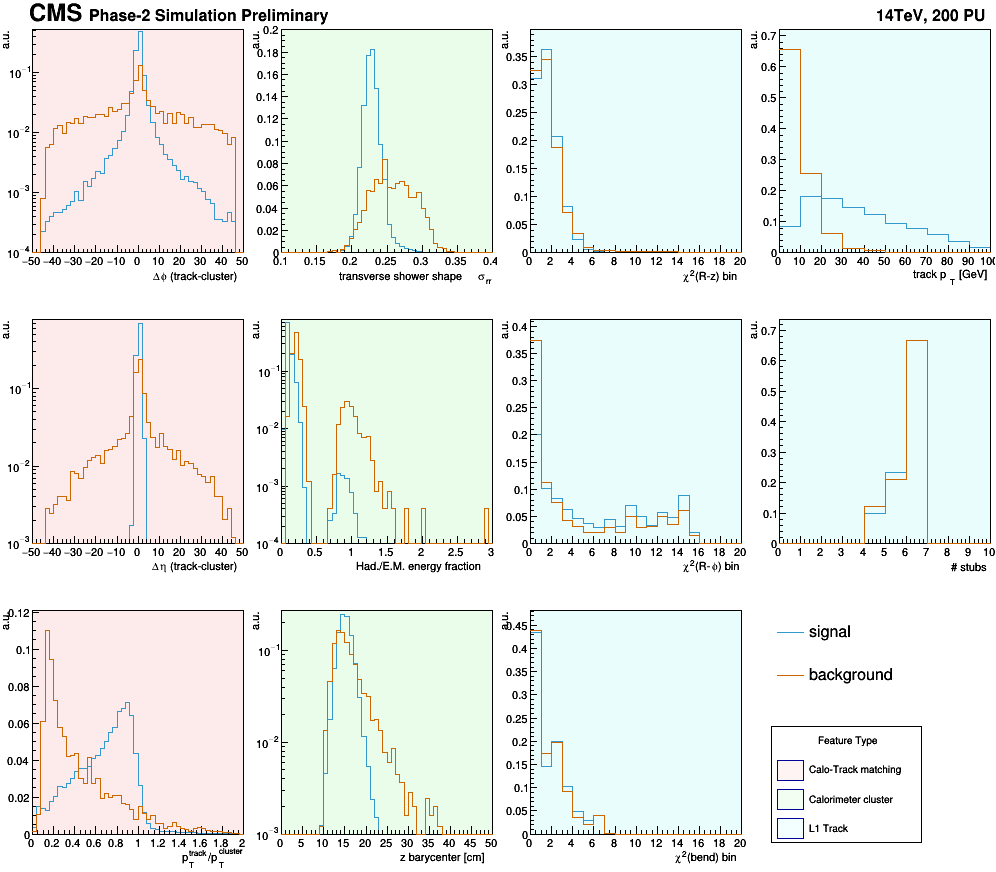

In [115]:
compare_features(h_feat_sig, h_feat_bkg, True)


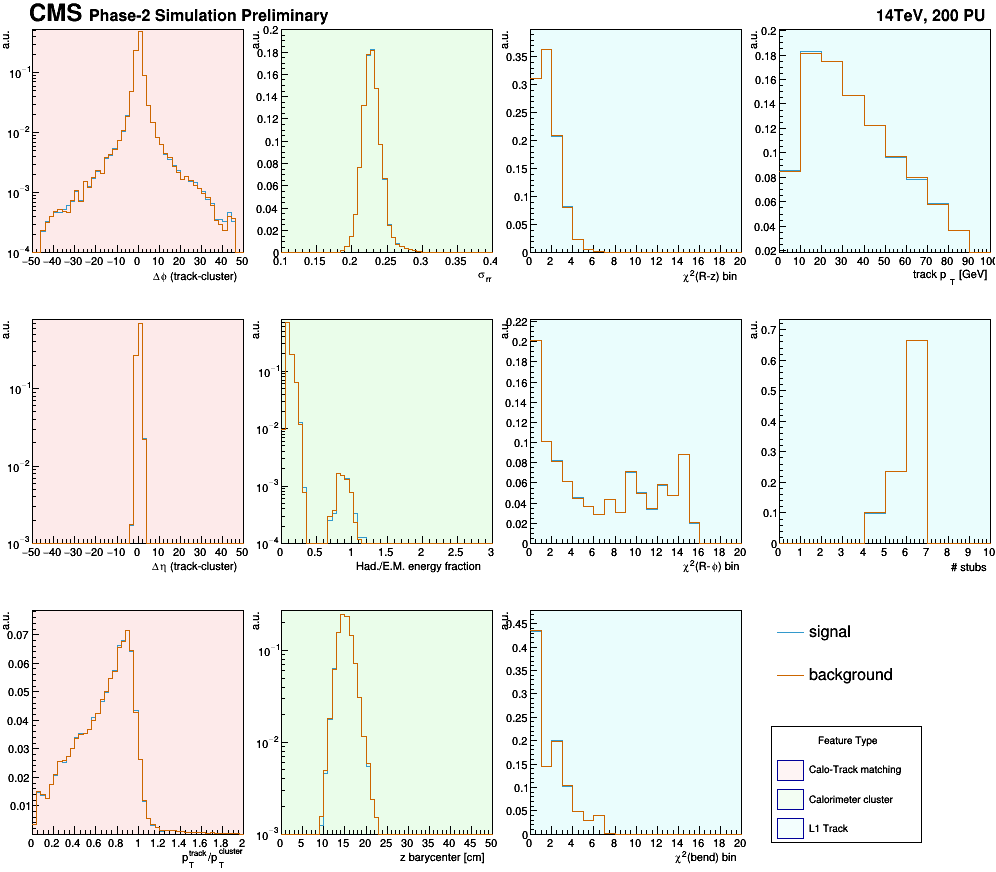

In [102]:
compare_features(h_feat_sig, h_feat_sig_pm)

In [104]:
compare_features(h_feat_bkg, h_feat_bkg_pm)

In [58]:




import hist
from hist import Hist

ax = hist.axis.Regular(100, 0, 1, flow=False, name="score", transform=hist.axis.transform.log, overflow=False, underflow=False,)
# cax = hist.axis.StrCategory(["signal", "background"], name="c")
full_hist = Hist(ax)
full_hist.fill(score=train_df[train_df.cat == 'signal'].pred, c="signal" )
full_hist.fill(score=train_df[train_df.cat == 'background'].pred, c="background")


s = full_hist.stack("c")
s.plot()

KeyError: 'Transform supplied, cannot change other options'

In [59]:
c = newCanvas()
h_sig.DrawNormalized()
h_bkg.SetLineColor(ROOT.kRed)
h_bkg.DrawNormalized("same")
c.Draw()

NameError: name 'h_sig' is not defined

## BDT training


In [77]:
# np.random.seed(1651231)
np.random.seed(15)

In [78]:
# training hyper-parameters
trainParams = {}
trainParams['objective'] = 'binary:logistic'
trainParams['nthread'] = 1
trainParams['random_state'] = 0
trainParams['max_depth'] = 4
trainParams['gamma'] = 0.0

In [79]:
pm_train_X = pm_global_train_df[variables].values
pm_train_y = pm_global_train_df.encoded_class.values
pm_training_egid   = xg.DMatrix( pm_train_X, label=pm_train_y, feature_names=variables )
pm_egid = xg.train( trainParams, pm_training_egid )



#### Split in test and training datasets

In [80]:
train_df, test_df = train_test_split(global_df.query(query_cut), test_size=0.15, random_state=42)
# train_valid_df.loc[:, 'encoded_class'] = label_encoder.fit_transform( train_valid_df['class'].values )
# train_df, valid_df = train_test_split(train_valid_df, test_size=0.1)

print(f'Train: {train_df.shape}')
# print(f'Valid: {valid_df.shape}')
print(f'Test: {test_df.shape}')


Train: (35878, 35)
Test: (6332, 35)


In [81]:
print_cat_population(test_df)

Total: 6332: sig: 5953(94.01452937460517%), bkg: 379(5.98547062539482%)


In [82]:
print_cat_population(train_df)

Total: 35878: sig: 33778(94.14683092703049%), bkg: 2100(5.853169072969508%)


In [83]:
egid_train_X = train_df[variables].values
egid_train_y = train_df.encoded_class.values

# egid_valid_X = valid_df[variables].values
# egid_valid_y = valid_df.encoded_class.values

egid_test_X = test_df[variables].values
egid_test_y = test_df.encoded_class.values




In [84]:
train_matrix   = xg.DMatrix( egid_train_X, label=egid_train_y, feature_names=variables )
test_matrix = xg.DMatrix( egid_test_X, label=egid_test_y, feature_names=variables )


In [85]:
%%time 

# Train the model
print (" --> Training the model: %s"%trainParams)
model = xg.train( trainParams, train_matrix )
print (" --> Done.")



 --> Training the model: {'objective': 'binary:logistic', 'nthread': 1, 'random_state': 0, 'max_depth': 4, 'gamma': 0.0}
 --> Done.
CPU times: user 259 ms, sys: 125 ms, total: 384 ms
Wall time: 138 ms


In [86]:
print(model.best_iteration)


9


In [87]:
results = {}
model_test = xg.train(
    params=trainParams, 
    dtrain=train_matrix, 
    num_boost_round=10,
    evals=[(train_matrix, 'train'), (test_matrix, 'eval')],
    evals_result=results,
    early_stopping_rounds=10,
    verbose_eval=1
)
print(model_test.best_iteration)
# print(model_test.best_score)
# print(model_test[model_test.best_iteration])
# model = model_test[model_test.best_iteration]

[0]	train-logloss:0.46297	eval-logloss:0.46202
[1]	train-logloss:0.33421	eval-logloss:0.33226
[2]	train-logloss:0.25305	eval-logloss:0.25084
[3]	train-logloss:0.19849	eval-logloss:0.19684
[4]	train-logloss:0.16143	eval-logloss:0.15930
[5]	train-logloss:0.13459	eval-logloss:0.13299
[6]	train-logloss:0.11550	eval-logloss:0.11369
[7]	train-logloss:0.10180	eval-logloss:0.10008
[8]	train-logloss:0.09109	eval-logloss:0.08994
[9]	train-logloss:0.08364	eval-logloss:0.08291
9


In [88]:
print(results.keys())
print(results['eval'].keys())

dict_keys(['train', 'eval'])
odict_keys(['logloss'])


In [89]:
model.save_model("gc_xgb.model")
myconfig = model.save_config()
with open("gc_xgb.json", 'w') as text_file:
    text_file.write(myconfig)

In [90]:
# # Save the model
# egid.save_model( '%s/BDT_%s/egid_%s_%s_%seta_%s.model'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin) )
# myconfig = egid.save_config()
# with open('%s/BDT_%s/egid_%s_%s_%seta_%s_config.json'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin) , "w") as text_file:
#   text_file.write(myconfig)

# print (myconfig)
# print (" --> Model saved: %s/BDT_%s/egid_%s_%s_%seta_%s.model"%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin))
 

Text(0, 1, 'Feature')

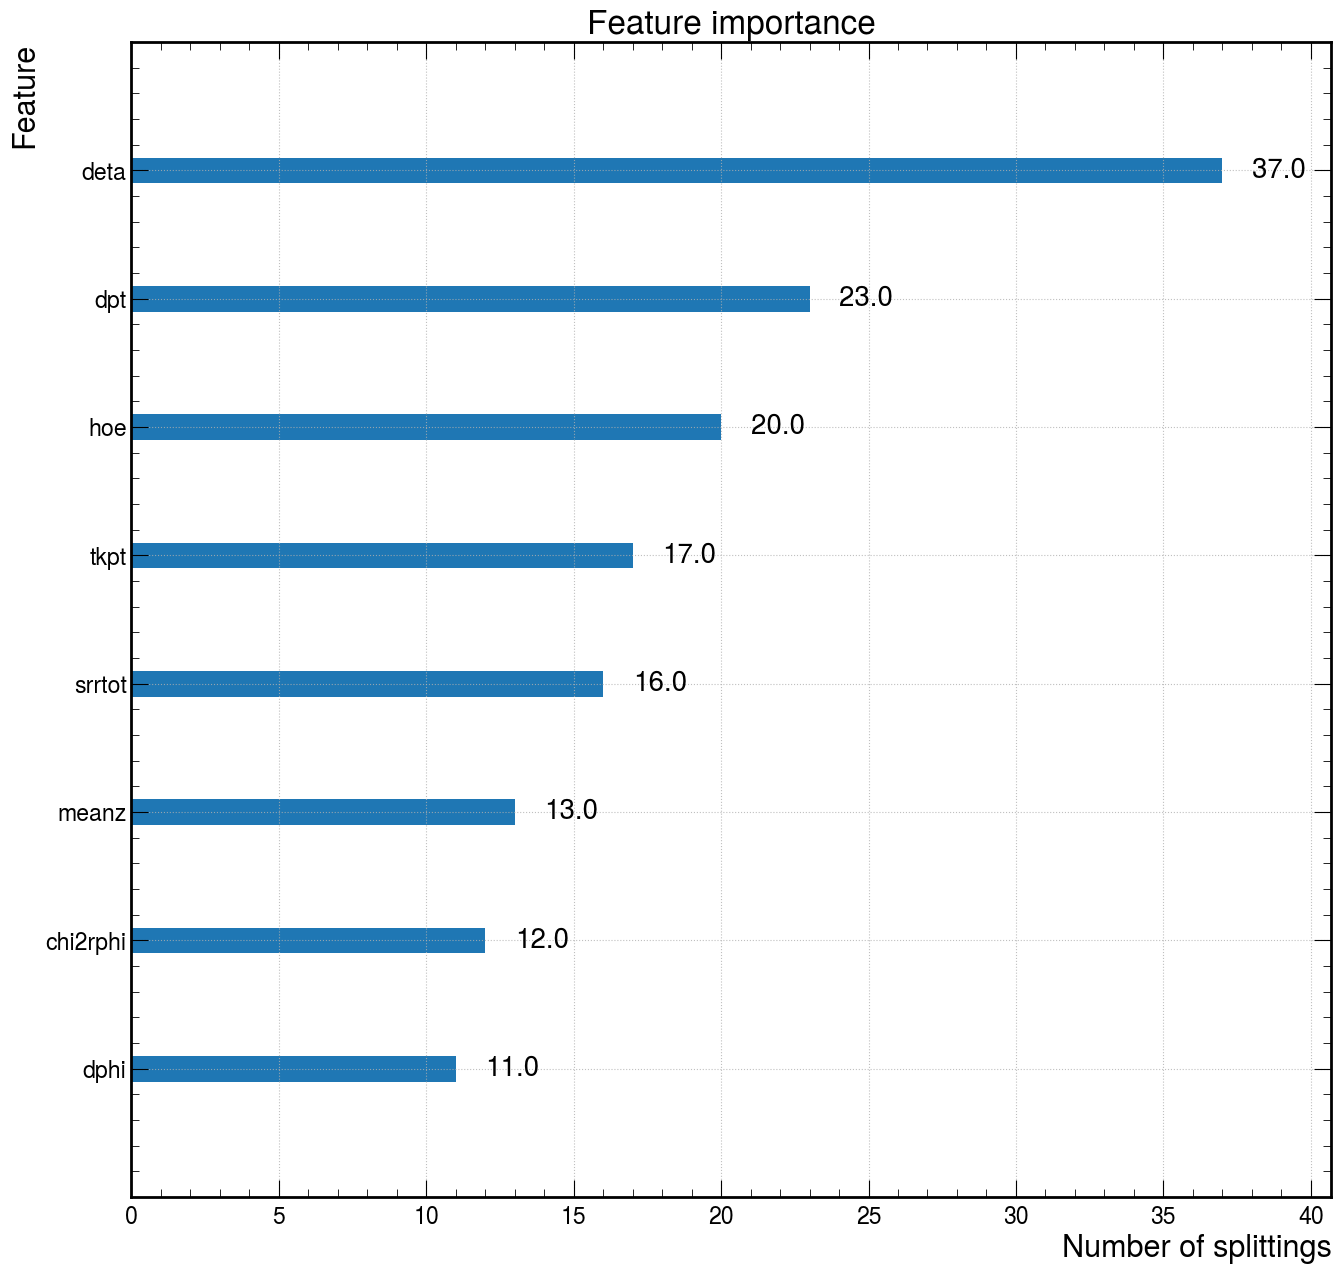

In [91]:
# Feature importance: number of splittings
xg.plot_importance( model )
plt.gcf().subplots_adjust( left = 0.3 )
plt.grid(True)
plt.xlabel( 'Number of splittings', fontsize = 22 )
plt.ylabel( 'Feature', fontsize = 22 )
# plt.savefig( '%s/BDT_%s/feature_importance_egid_split_%s_%s_%s_%s.pdf'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.savefig( '%s/BDT_%s/feature_importance_egid_split_%s_%s_%s_%s.png'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.clf()


Text(0, 1, 'Feature')

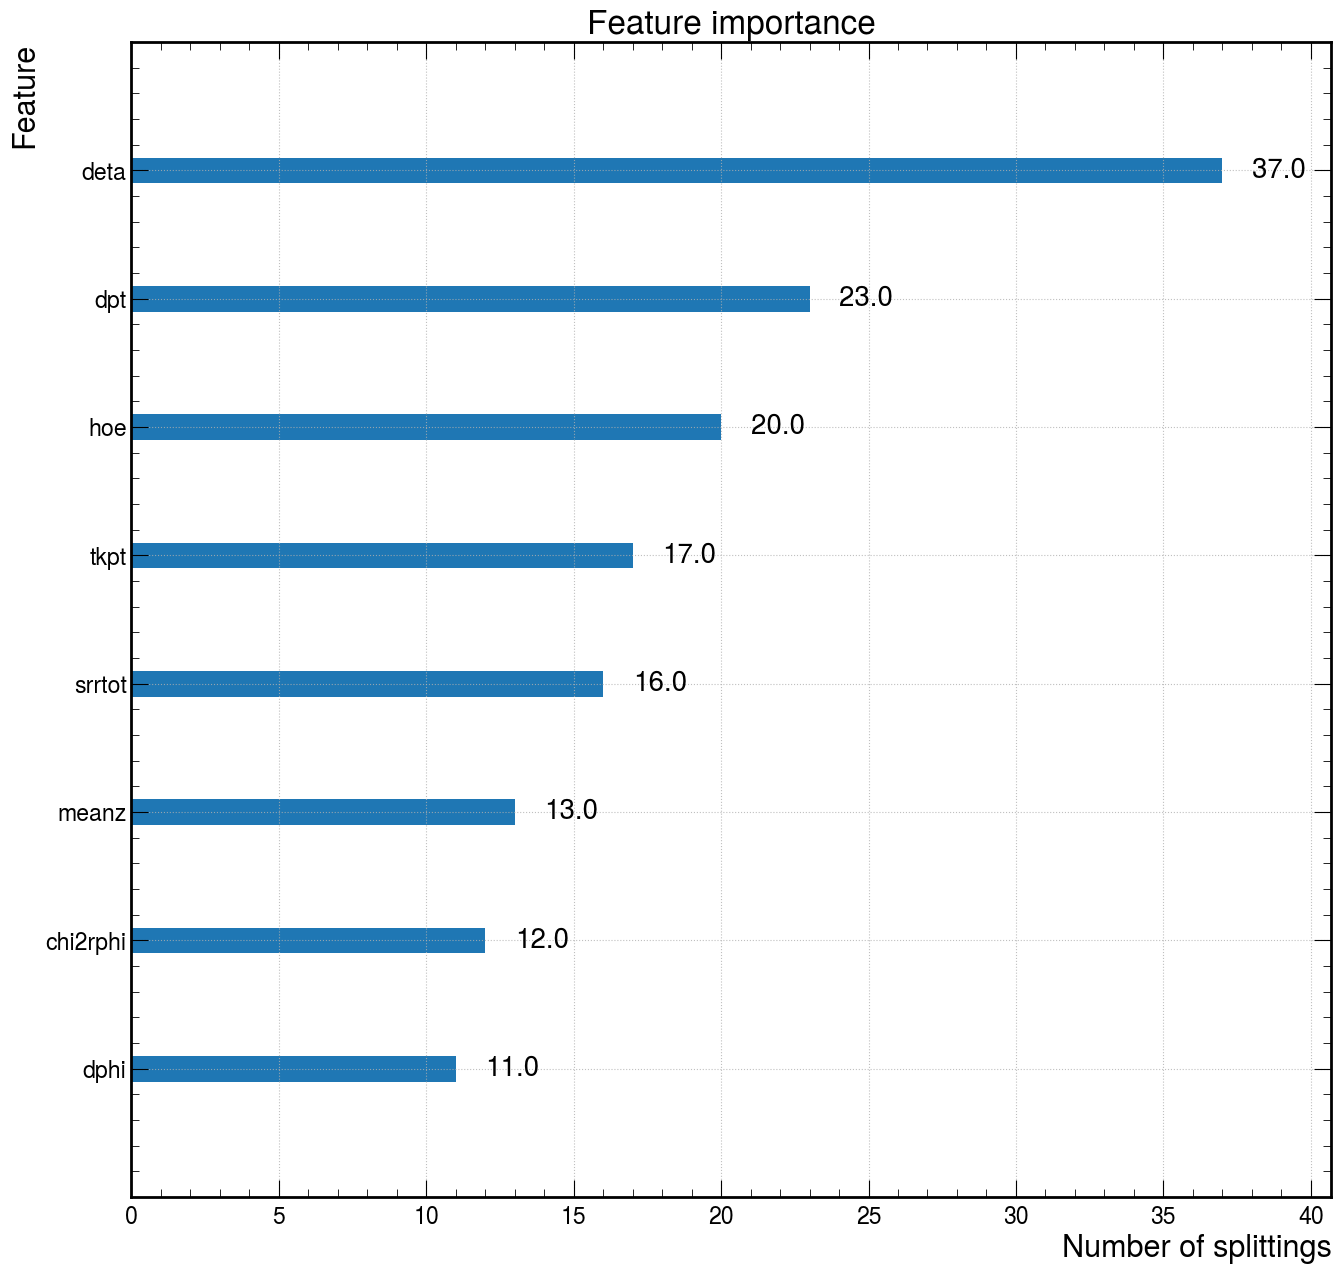

In [92]:
# Feature importance: number of splittings
xg.plot_importance( model_test )
plt.gcf().subplots_adjust( left = 0.3 )
plt.grid(True)
plt.xlabel( 'Number of splittings', fontsize = 22 )
plt.ylabel( 'Feature', fontsize = 22 )
# plt.savefig( '%s/BDT_%s/feature_importance_egid_split_%s_%s_%s_%s.pdf'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.savefig( '%s/BDT_%s/feature_importance_egid_split_%s_%s_%s_%s.png'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.clf()


Text(0, 1, 'Feature')

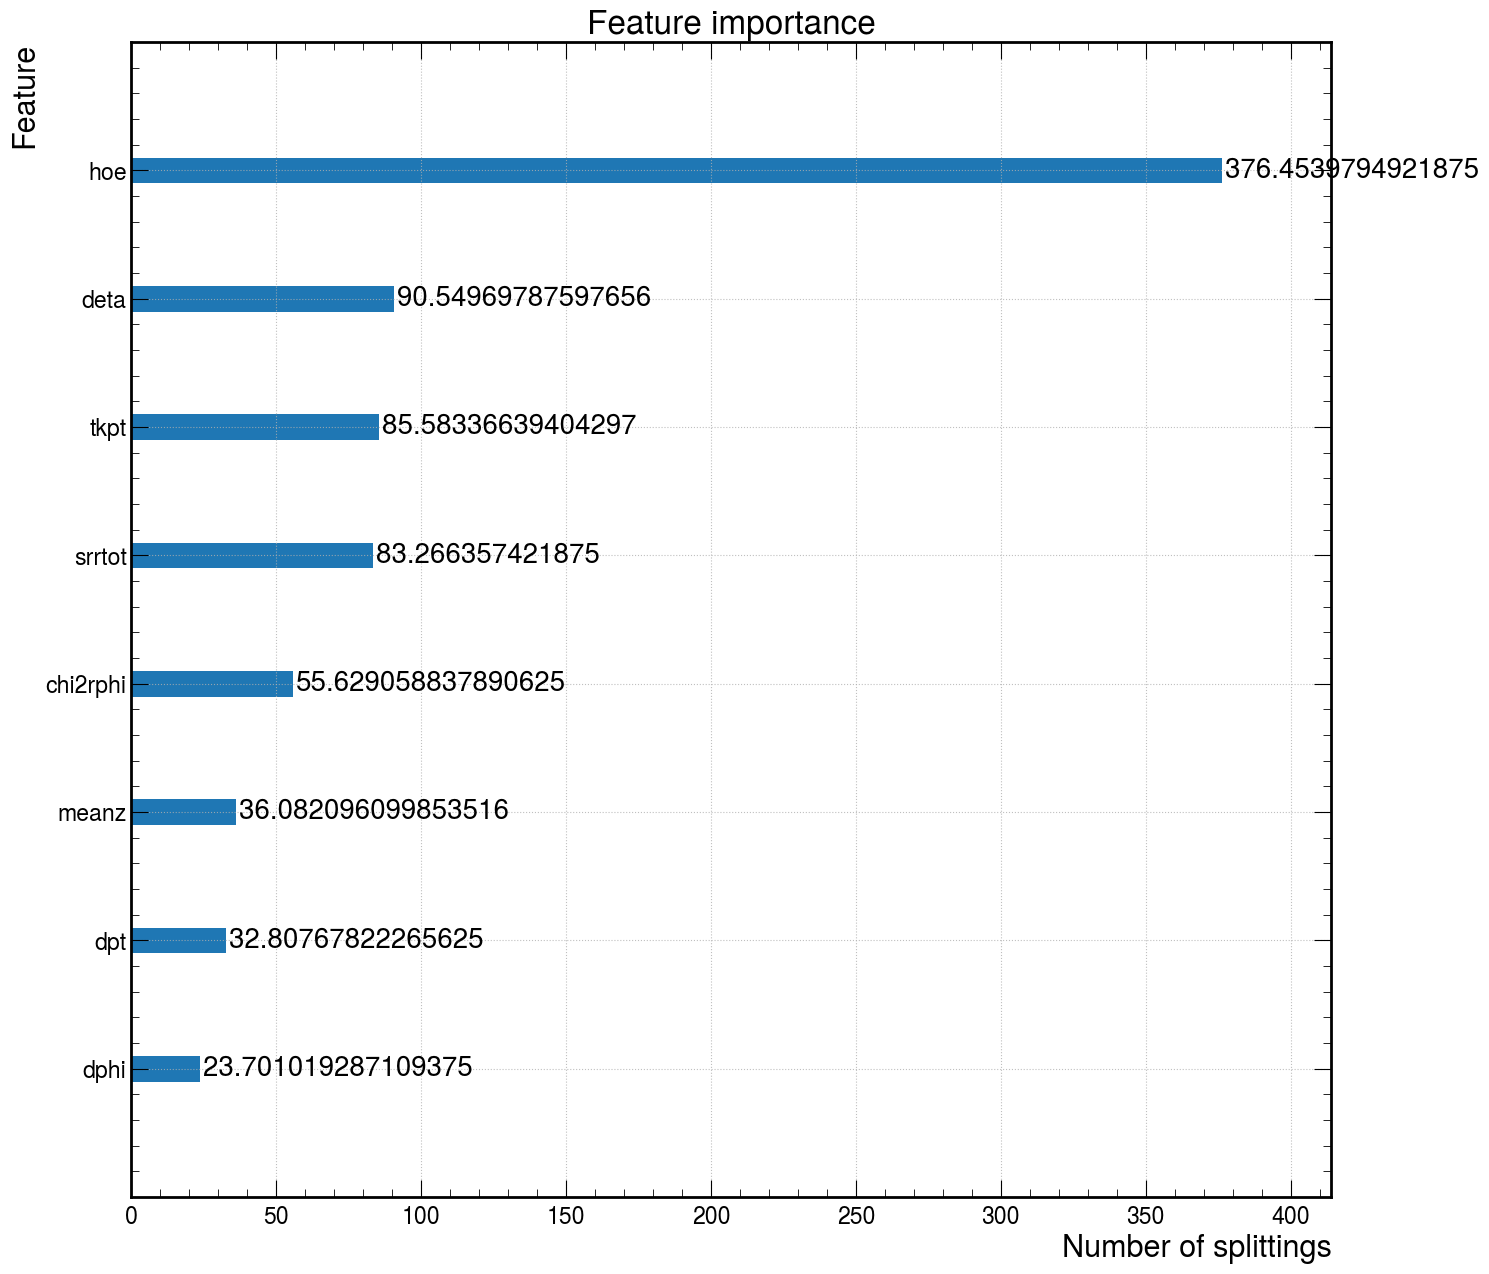

In [93]:
# Feature importance: gains
xg.plot_importance( model , importance_type="gain")
plt.gcf().subplots_adjust( left = 0.3 )
plt.grid(True)
plt.xlabel( 'Number of splittings', fontsize = 22 )
plt.ylabel( 'Feature', fontsize = 22 )
# plt.savefig( '%s/BDT_%s/feature_importance_egid_gain_%s_%s_%s_%s.pdf'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.savefig( '%s/BDT_%s/feature_importance_egid_gain_%s_%s_%s_%s.png'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.clf()


In [94]:
egid_train_X.shape

(35878, 11)

In [95]:
# Feature importance: Shapley values
XD=training_egid
XD.shape=[egid_train_X.shape[0],len(variables)]
explainer = shap.TreeExplainer(egid)
shap_values = explainer(XD)
shap_values.data=egid_train_X
shap_values.feature_names=egid_vars[bdt_name]

shap.plots.beeswarm(shap_values, max_display=27)
plt.gcf().subplots_adjust( left = 0.3 )
plt.grid(True)
# plt.savefig( '%s/BDT_%s/feature_importance_egid_shap_%s_%s_%s_%s.pdf'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.savefig( '%s/BDT_%s/feature_importance_egid_shap_%s_%s_%s_%s.png'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.clf()

shap.plots.bar(shap_values.abs.mean(0), max_display=27)
plt.gcf().subplots_adjust( left = 0.3 )
plt.grid(True)
# plt.savefig( '%s/BDT_%s/feature_importance_egid_shapbar_%s_%s_%s_%s.pdf'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.savefig( '%s/BDT_%s/feature_importance_egid_shapbar_%s_%s_%s_%s.png'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.clf()
  

NameError: name 'training_egid' is not defined

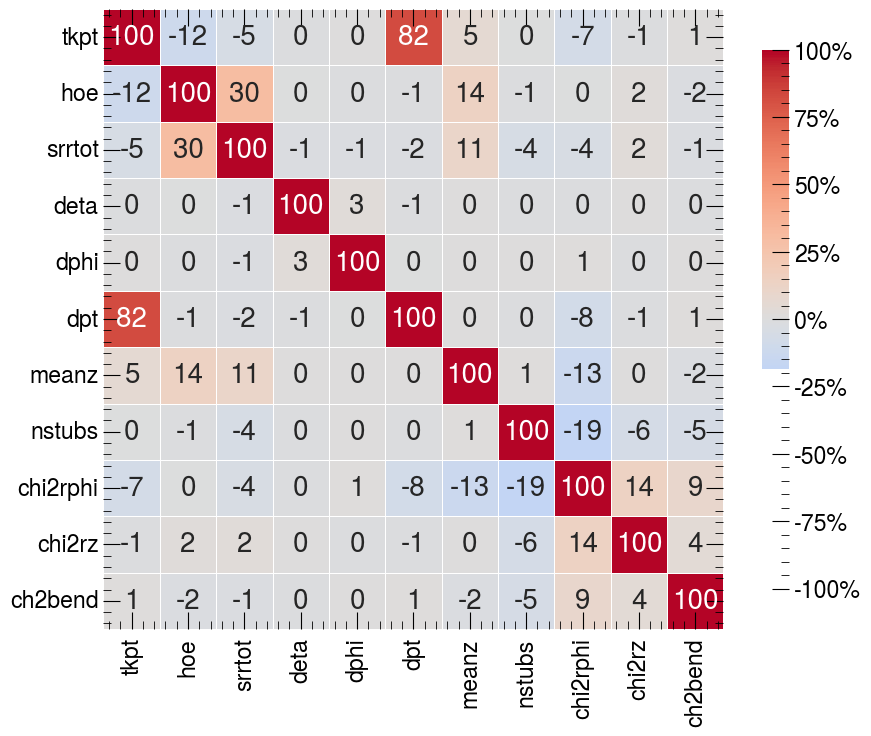

In [96]:
# Correlation matrix
correlations = train_df[variables].corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(correlations, vmax=1.0, center=0, cmap="coolwarm",
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
            )
for t in ax.texts: t.set_text(str(int(100.* float(t.get_text()))))
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['-100%', '-75%', '-50%', '-25%', '0%', '25%', '50%', '75%', '100%'])
# plt.savefig( '%s/BDT_%s/correlations_%s_%s_%s_%s.pdf'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.savefig( '%s/BDT_%s/correlations_%s_%s_%s_%s.png'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))


In [97]:
# Save in raw format
# if not os.path.isdir("out/raw"): os.system("mkdir models/raw")
model.dump_model("%s/BDT_%s/egid_%s_%s_%seta_%s.raw.txt"%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin))
print (" --> Model saved (RAW): %s/BDT_%s/egid_%s_%s_%seta_%s.raw.txt"%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin))


NameError: name 'out' is not defined

## Performance evaluation

In [98]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# CHECKING PERFORMANCE OF MODEL: using trainig and validation sets
egid_train_predy = model.predict( train_matrix )
# egid_valid_predy = egid.predict( validation_egid )
egid_test_predy = model.predict( test_matrix )


print ("    *************************************************")
# print ("    --> Performance: in %s eta region (%2.1f < |eta| < %2.1f)"%(reg,eta_regions[reg][0],eta_regions[reg][1]))
print ("      * Training set   ::: AUC = %5.4f"%roc_auc_score( egid_train_y, egid_train_predy ))
# print ("      * Validation set ::: AUC = %5.4f"%roc_auc_score( egid_valid_y, egid_valid_predy ))
print ("      * Test set ::: AUC = %5.4f"%roc_auc_score( egid_test_y, egid_test_predy ))

print ("    *************************************************")
print ("")

#END OF LOOP OVER ETA REGIONS
print ("~~~~~~~~~~~~~~~~~~~~~ egid TRAINING (END) ~~~~~~~~~~~~~~~~~~~~~")
# END OF TRAINING FUNCTION


    *************************************************
      * Training set   ::: AUC = 0.9826
      * Test set ::: AUC = 0.9851
    *************************************************

~~~~~~~~~~~~~~~~~~~~~ egid TRAINING (END) ~~~~~~~~~~~~~~~~~~~~~


In [99]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# CHECKING PERFORMANCE OF MODEL: using trainig and validation sets
egid_train_predy = model_test.predict( train_matrix )
# egid_valid_predy = egid.predict( validation_egid )
egid_test_predy = model_test.predict( test_matrix )


print ("    *************************************************")
# print ("    --> Performance: in %s eta region (%2.1f < |eta| < %2.1f)"%(reg,eta_regions[reg][0],eta_regions[reg][1]))
print ("      * Training set   ::: AUC = %5.4f"%roc_auc_score( egid_train_y, egid_train_predy ))
# print ("      * Validation set ::: AUC = %5.4f"%roc_auc_score( egid_valid_y, egid_valid_predy ))
print ("      * Test set ::: AUC = %5.4f"%roc_auc_score( egid_test_y, egid_test_predy ))

print ("    *************************************************")
print ("")

#END OF LOOP OVER ETA REGIONS
print ("~~~~~~~~~~~~~~~~~~~~~ egid TRAINING (END) ~~~~~~~~~~~~~~~~~~~~~")
# END OF TRAINING FUNCTION


    *************************************************
      * Training set   ::: AUC = 0.9826
      * Test set ::: AUC = 0.9851
    *************************************************

~~~~~~~~~~~~~~~~~~~~~ egid TRAINING (END) ~~~~~~~~~~~~~~~~~~~~~


In [100]:
working_points = [0.995,0.98,0.975,0.97,0.965,0.96,0.955,0.95,0.94,0.93,0.92,0.91,0.9,0.8,0.7,0.65,0.6,0.55,0.5,0.45,0.4]

In [101]:
# WP: (tmva_btd_cut, eff._b) from Composite ID model trained by Peter
pm_wps = {0.995: (-0.9788088, 0.3483),
0.980: (-0.9080535, 0.1868),
0.975: (-0.8498923, 0.1581),
0.970: (-0.7961012, 0.1418),
0.965: (-0.7459061, 0.1268),
0.960: (-0.6819094, 0.1110),
0.955: (-0.6241989, 0.0985),
0.950: (-0.5871849, 0.0917),
0.940: (-0.4392925, 0.0788),
0.930: (-0.2919413, 0.0638),
0.920: (-0.1440416, 0.0531),
0.910: (0.0825459, 0.0437),
0.900: (0.2124904, 0.0373),
0.800: (0.9347647, 0.0081),
0.700: (0.9914881, 0.0034),
0.650: (0.9954325, 0.0021),
0.600: (0.9958264, 0.0017),
0.550: (0.9976058, 0.0013),
0.500: (0.9977186, 0.0004),
0.450: (0.9978157, 0.0004),
0.400: (0.9985109, 0.0004),}

In [102]:

def tmva2xgb(score):
    return 1 / (1+ math.sqrt( (1-score) / (1+score) ))

def xgb2conifer(score):
    return logit(score)



In [103]:
dtest = xgb.DMatrix(X_test, label=y_test)
for train, test in tqdm(folds, total=len(folds)):
    dtrain = xgb.DMatrix(X_train.iloc[train,:], label=y_train.iloc[train])
    dval   = xgb.DMatrix(X_train.iloc[test,:], label=y_train.iloc[test])
    model  = xgb.train(
        dtrain                = dtrain,
        params                = params, 
        evals                 = [(dtrain, 'train'), (dval, 'val')],
        num_boost_round       = 1000,
        verbose_eval          = False,
        early_stopping_rounds = 10,
    )
    sets = [dtrain, dval, dtest]
    for i,ds in enumerate(results.keys()):
        y_preds              = model.predict(sets[i])
        labels               = sets[i].get_label()
        fpr, tpr, thresholds = roc_curve(labels, y_preds)
        results[ds]['fpr'].append(fpr)
        results[ds]['tpr'].append(tpr)
        results[ds]['thresholds'].append(thresholds)
        results[ds]['auc'].append(roc_auc_score(labels, y_preds))

NameError: name 'xgb' is not defined

In [104]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score
from scipy.special import logit, expit


In [105]:
plt.style.use(hep.style.CMS)
hep.style.CMS

{'font.sans-serif': ['TeX Gyre Heros', 'Helvetica', 'Arial'],
 'font.family': 'sans-serif',
 'mathtext.fontset': 'custom',
 'mathtext.rm': 'TeX Gyre Heros',
 'mathtext.bf': 'TeX Gyre Heros:bold',
 'mathtext.sf': 'TeX Gyre Heros',
 'mathtext.it': 'TeX Gyre Heros:italic',
 'mathtext.tt': 'TeX Gyre Heros',
 'mathtext.cal': 'TeX Gyre Heros',
 'mathtext.default': 'regular',
 'figure.figsize': (10.0, 10.0),
 'font.size': 20,
 'axes.labelsize': 'medium',
 'axes.unicode_minus': False,
 'xtick.labelsize': 'small',
 'ytick.labelsize': 'small',
 'legend.fontsize': 'small',
 'legend.handlelength': 1.5,
 'legend.borderpad': 0.5,
 'legend.frameon': False,
 'xtick.direction': 'in',
 'xtick.major.size': 12,
 'xtick.minor.size': 6,
 'xtick.major.pad': 6,
 'xtick.top': True,
 'xtick.major.top': True,
 'xtick.major.bottom': True,
 'xtick.minor.top': True,
 'xtick.minor.bottom': True,
 'xtick.minor.visible': True,
 'ytick.direction': 'in',
 'ytick.major.size': 12,
 'ytick.minor.size': 6.0,
 'ytick.right':

Text(0, 1, 'signal efficiency')

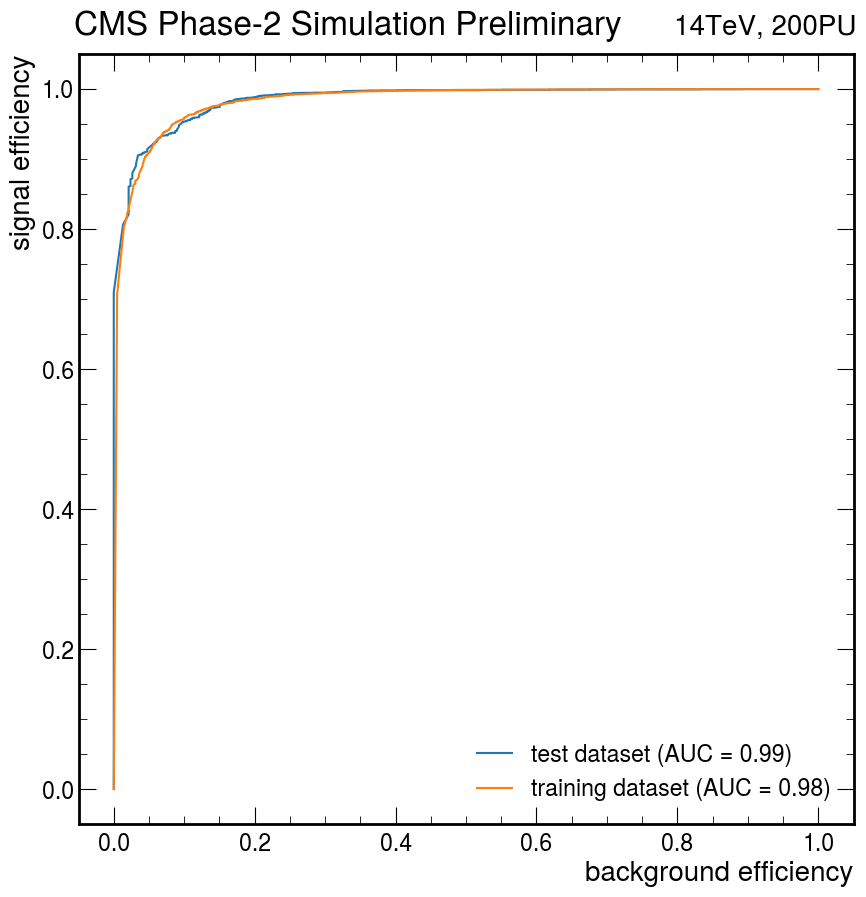

In [106]:
fig, ax = plt.subplots()
fig.text(0.12, 0.9, 'CMS Phase-2 Simulation Preliminary',fontsize='large')
fig.text(0.72, 0.9, '14TeV, 200PU',figure=fig)


egid_train_predy = model_test.predict( train_matrix )
egid_test_predy = model_test.predict( test_matrix )
RocCurveDisplay.from_predictions(egid_test_y, egid_test_predy, pos_label=1, ax=ax, name='test dataset')
RocCurveDisplay.from_predictions(egid_train_y, egid_train_predy, pos_label=1, ax=ax, name='training dataset')
ax.set_xlabel('background efficiency')
ax.set_ylabel('signal efficiency')

# fig.savefig('composite_roc.pdf')

In [107]:
# egid_test_y = 
fpr, tpr, thresholds = roc_curve(egid_test_y, egid_test_predy)
auc = roc_auc_score(egid_test_y, egid_test_predy)
# print(tpr)
# print(auc)


wp_thr = {}
for wp in working_points: 
    idx = np.abs(tpr-wp).argmin()
    print(f'WP eff_s: {wp}, thr: {thresholds[idx]:0,.2f} ({tmva2xgb(pm_wps[wp][0]):0,.2f}) eff_b: {fpr[idx]:0,.2f} ({pm_wps[wp][1]:0,.2f}) ')
    wp_thr[wp] = thresholds[idx]


for wp in [0.955, 0.900]:
    thr = wp_thr[wp]
    print(f'---- WP eff: {wp}, threshold: {thr:0,.4f}' )
    class_pred = egid_test_predy > thr
    print('Accuracy score is: ',accuracy_score(egid_test_y, class_pred) * 100)
    print(classification_report(egid_test_y, class_pred))

# class_pred = egid_test_predy > wp_thr[0.900]
# print('Accuracy score is: ',accuracy_score(egid_test_y, class_pred) * 100)
# print(classification_report(egid_test_y, class_pred))

WP eff_s: 0.995, thr: 0.52 (0.09) eff_b: 0.28 (0.35) 
WP eff_s: 0.98, thr: 0.75 (0.18) eff_b: 0.16 (0.19) 
WP eff_s: 0.975, thr: 0.79 (0.22) eff_b: 0.15 (0.16) 
WP eff_s: 0.97, thr: 0.82 (0.25) eff_b: 0.13 (0.14) 
WP eff_s: 0.965, thr: 0.84 (0.28) eff_b: 0.13 (0.13) 
WP eff_s: 0.96, thr: 0.85 (0.30) eff_b: 0.12 (0.11) 
WP eff_s: 0.955, thr: 0.87 (0.32) eff_b: 0.10 (0.10) 
WP eff_s: 0.95, thr: 0.87 (0.34) eff_b: 0.09 (0.09) 
WP eff_s: 0.94, thr: 0.88 (0.38) eff_b: 0.09 (0.08) 
WP eff_s: 0.93, thr: 0.90 (0.43) eff_b: 0.06 (0.06) 
WP eff_s: 0.92, thr: 0.91 (0.46) eff_b: 0.06 (0.05) 
WP eff_s: 0.91, thr: 0.92 (0.52) eff_b: 0.04 (0.04) 
WP eff_s: 0.9, thr: 0.92 (0.55) eff_b: 0.03 (0.04) 
WP eff_s: 0.8, thr: 0.97 (0.84) eff_b: 0.01 (0.01) 
WP eff_s: 0.7, thr: 0.98 (0.94) eff_b: 0.00 (0.00) 
WP eff_s: 0.65, thr: 0.98 (0.95) eff_b: 0.00 (0.00) 
WP eff_s: 0.6, thr: 0.98 (0.96) eff_b: 0.00 (0.00) 
WP eff_s: 0.55, thr: 0.98 (0.97) eff_b: 0.00 (0.00) 
WP eff_s: 0.5, thr: 0.98 (0.97) eff_b: 0.00 (0

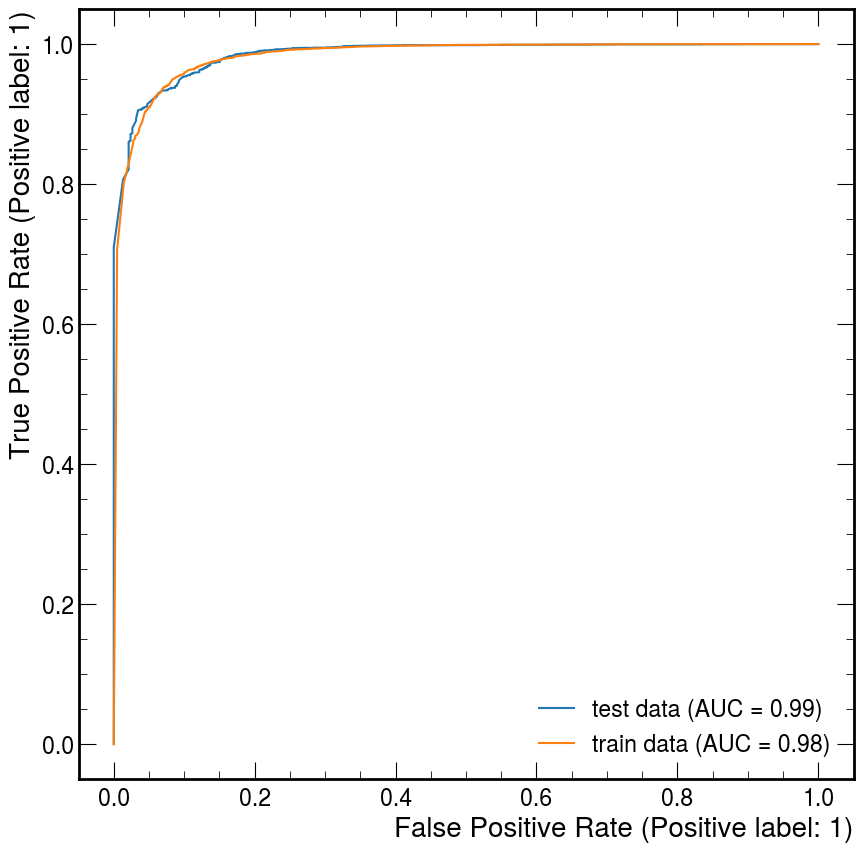

In [108]:
fig, ax = plt.subplots()

egid_train_predy = model.predict( train_matrix )
egid_test_predy = model.predict( test_matrix )
RocCurveDisplay.from_predictions(egid_test_y, egid_test_predy, pos_label=1, ax=ax, name='test data')
RocCurveDisplay.from_predictions(egid_train_y, egid_train_predy, pos_label=1, ax=ax, name='train data')



In [109]:
# egid_test_y = 
fpr, tpr, thresholds = roc_curve(egid_test_y, egid_test_predy)
auc = roc_auc_score(egid_test_y, egid_test_predy)
# print(tpr)
# print(auc)


wp_thr = {}
for wp in working_points: 
    idx = np.abs(tpr-wp).argmin()
    print(f'WP eff_s: {wp}, thr: {thresholds[idx]:0,.2f} ({tmva2xgb(pm_wps[wp][0]):0,.2f}) eff_b: {fpr[idx]:0,.2f} ({pm_wps[wp][1]:0,.2f}) ')
    wp_thr[wp] = thresholds[idx]


for wp in [0.955, 0.900]:
    thr = wp_thr[wp]
    print(f'---- WP eff: {wp}, threshold: {thr:0,.4f}' )
    class_pred = egid_test_predy > thr
    print('Accuracy score is: ',accuracy_score(egid_test_y, class_pred) * 100)
    print(classification_report(egid_test_y, class_pred))

    test_df.loc[: , f'pred_wp{wp}'] = class_pred

# class_pred = egid_test_predy > wp_thr[0.900]
# print('Accuracy score is: ',accuracy_score(egid_test_y, class_pred) * 100)
# print(classification_report(egid_test_y, class_pred))

WP eff_s: 0.995, thr: 0.52 (0.09) eff_b: 0.28 (0.35) 
WP eff_s: 0.98, thr: 0.75 (0.18) eff_b: 0.16 (0.19) 
WP eff_s: 0.975, thr: 0.79 (0.22) eff_b: 0.15 (0.16) 
WP eff_s: 0.97, thr: 0.82 (0.25) eff_b: 0.13 (0.14) 
WP eff_s: 0.965, thr: 0.84 (0.28) eff_b: 0.13 (0.13) 
WP eff_s: 0.96, thr: 0.85 (0.30) eff_b: 0.12 (0.11) 
WP eff_s: 0.955, thr: 0.87 (0.32) eff_b: 0.10 (0.10) 
WP eff_s: 0.95, thr: 0.87 (0.34) eff_b: 0.09 (0.09) 
WP eff_s: 0.94, thr: 0.88 (0.38) eff_b: 0.09 (0.08) 
WP eff_s: 0.93, thr: 0.90 (0.43) eff_b: 0.06 (0.06) 
WP eff_s: 0.92, thr: 0.91 (0.46) eff_b: 0.06 (0.05) 
WP eff_s: 0.91, thr: 0.92 (0.52) eff_b: 0.04 (0.04) 
WP eff_s: 0.9, thr: 0.92 (0.55) eff_b: 0.03 (0.04) 
WP eff_s: 0.8, thr: 0.97 (0.84) eff_b: 0.01 (0.01) 
WP eff_s: 0.7, thr: 0.98 (0.94) eff_b: 0.00 (0.00) 
WP eff_s: 0.65, thr: 0.98 (0.95) eff_b: 0.00 (0.00) 
WP eff_s: 0.6, thr: 0.98 (0.96) eff_b: 0.00 (0.00) 
WP eff_s: 0.55, thr: 0.98 (0.97) eff_b: 0.00 (0.00) 
WP eff_s: 0.5, thr: 0.98 (0.97) eff_b: 0.00 (0

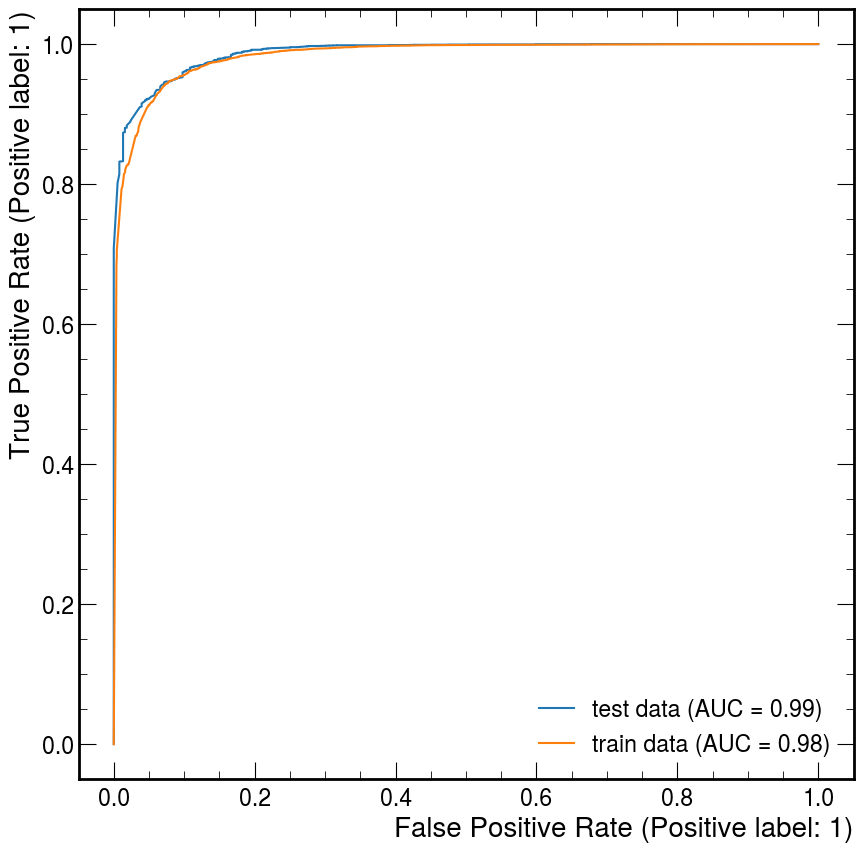

In [110]:
fig, ax = plt.subplots()

egid_train_predy = pm_egid.predict( train_matrix )
egid_test_predy = pm_egid.predict( test_matrix )
RocCurveDisplay.from_predictions(egid_test_y, egid_test_predy, pos_label=1, ax=ax, name='test data')
RocCurveDisplay.from_predictions(egid_train_y, egid_train_predy, pos_label=1, ax=ax, name='train data')



In [111]:
# egid_test_y = 
fpr, tpr, thresholds = roc_curve(egid_test_y, egid_test_predy)
auc = roc_auc_score(egid_test_y, egid_test_predy)
# print(tpr)
# print(auc)


wp_thr = {}
for wp in working_points: 
    idx = np.abs(tpr-wp).argmin()
    print(f'WP eff_s: {wp}, thr: {thresholds[idx]:0,.2f} ({tmva2xgb(pm_wps[wp][0]):0,.2f}) eff_b: {fpr[idx]:0,.2f} ({pm_wps[wp][1]:0,.2f}) ')
    wp_thr[wp] = thresholds[idx]


for wp in [0.955, 0.900]:
    thr = wp_thr[wp]
    print(f'---- WP eff: {wp}, threshold: {thr:0,.4f}' )
    class_pred = egid_test_predy > thr
    print('Accuracy score is: ',accuracy_score(egid_test_y, class_pred) * 100)
    print(classification_report(egid_test_y, class_pred))

# class_pred = egid_test_predy > wp_thr[0.900]
# print('Accuracy score is: ',accuracy_score(egid_test_y, class_pred) * 100)
# print(classification_report(egid_test_y, class_pred))

WP eff_s: 0.995, thr: 0.55 (0.09) eff_b: 0.25 (0.35) 
WP eff_s: 0.98, thr: 0.74 (0.18) eff_b: 0.16 (0.19) 
WP eff_s: 0.975, thr: 0.80 (0.22) eff_b: 0.14 (0.16) 
WP eff_s: 0.97, thr: 0.82 (0.25) eff_b: 0.12 (0.14) 
WP eff_s: 0.965, thr: 0.84 (0.28) eff_b: 0.11 (0.13) 
WP eff_s: 0.96, thr: 0.86 (0.30) eff_b: 0.10 (0.11) 
WP eff_s: 0.955, thr: 0.87 (0.32) eff_b: 0.10 (0.10) 
WP eff_s: 0.95, thr: 0.87 (0.34) eff_b: 0.09 (0.09) 
WP eff_s: 0.94, thr: 0.89 (0.38) eff_b: 0.07 (0.08) 
WP eff_s: 0.93, thr: 0.90 (0.43) eff_b: 0.06 (0.06) 
WP eff_s: 0.92, thr: 0.91 (0.46) eff_b: 0.04 (0.05) 
WP eff_s: 0.91, thr: 0.92 (0.52) eff_b: 0.04 (0.04) 
WP eff_s: 0.9, thr: 0.92 (0.55) eff_b: 0.02 (0.04) 
WP eff_s: 0.8, thr: 0.97 (0.84) eff_b: 0.01 (0.01) 
WP eff_s: 0.7, thr: 0.97 (0.94) eff_b: 0.00 (0.00) 
WP eff_s: 0.65, thr: 0.98 (0.95) eff_b: 0.00 (0.00) 
WP eff_s: 0.6, thr: 0.98 (0.96) eff_b: 0.00 (0.00) 
WP eff_s: 0.55, thr: 0.98 (0.97) eff_b: 0.00 (0.00) 
WP eff_s: 0.5, thr: 0.98 (0.97) eff_b: 0.00 (0

In [112]:
# Working Points: emulator_12p5
#  --> Eta region: low
#           * At epsilon_s = 0.995 ::: BDT cut = -0.9788088, epsilon_b = 0.3483
#           * At epsilon_s = 0.980 ::: BDT cut = -0.9080535, epsilon_b = 0.1868
#           * At epsilon_s = 0.975 ::: BDT cut = -0.8498923, epsilon_b = 0.1581
#           * At epsilon_s = 0.970 ::: BDT cut = -0.7961012, epsilon_b = 0.1418
#           * At epsilon_s = 0.965 ::: BDT cut = -0.7459061, epsilon_b = 0.1268
#           * At epsilon_s = 0.960 ::: BDT cut = -0.6819094, epsilon_b = 0.1110
#           * At epsilon_s = 0.955 ::: BDT cut = -0.6241989, epsilon_b = 0.0985
#           * At epsilon_s = 0.950 ::: BDT cut = -0.5871849, epsilon_b = 0.0917
#           * At epsilon_s = 0.940 ::: BDT cut = -0.4392925, epsilon_b = 0.0788
#           * At epsilon_s = 0.930 ::: BDT cut = -0.2919413, epsilon_b = 0.0638
#           * At epsilon_s = 0.920 ::: BDT cut = -0.1440416, epsilon_b = 0.0531
#           * At epsilon_s = 0.910 ::: BDT cut = 0.0825459, epsilon_b = 0.0437
#           * At epsilon_s = 0.900 ::: BDT cut = 0.2124904, epsilon_b = 0.0373
#           * At epsilon_s = 0.800 ::: BDT cut = 0.9347647, epsilon_b = 0.0081
#           * At epsilon_s = 0.700 ::: BDT cut = 0.9914881, epsilon_b = 0.0034
#           * At epsilon_s = 0.650 ::: BDT cut = 0.9954325, epsilon_b = 0.0021
#           * At epsilon_s = 0.600 ::: BDT cut = 0.9958264, epsilon_b = 0.0017
#           * At epsilon_s = 0.550 ::: BDT cut = 0.9976058, epsilon_b = 0.0013
#           * At epsilon_s = 0.500 ::: BDT cut = 0.9977186, epsilon_b = 0.0004
#           * At epsilon_s = 0.450 ::: BDT cut = 0.9978157, epsilon_b = 0.0004
#           * At epsilon_s = 0.400 ::: BDT cut = 0.9985109, epsilon_b = 0.0004


In [113]:
import json
config = model.save_config()
d = json.loads(config)

pprint.pprint(d)

{'learner': {'generic_param': {'fail_on_invalid_gpu_id': '0',
                               'gpu_id': '-1',
                               'n_jobs': '1',
                               'nthread': '1',
                               'random_state': '0',
                               'seed': '0',
                               'seed_per_iteration': '0',
                               'validate_parameters': '1'},
             'gradient_booster': {'gbtree_model_param': {'num_parallel_tree': '1',
                                                         'num_trees': '10',
                                                         'size_leaf_vector': '0'},
                                  'gbtree_train_param': {'predictor': 'auto',
                                                         'process_type': 'default',
                                                         'tree_method': 'exact',
                                                         'updater': 'grow_colmaker,prune',
        


## Load previous model and compare

In [114]:
import pprint
import json
pm_model = xg.Booster()
pm_model.load_model("../egid_emulator_12p5_Histomaxvardr_loweta_high.model")


config = pm_model.save_config()
d = json.loads(config)

pprint.pprint(d)

{'learner': {'generic_param': {'fail_on_invalid_gpu_id': '0',
                               'gpu_id': '-1',
                               'n_jobs': '0',
                               'nthread': '0',
                               'random_state': '0',
                               'seed': '0',
                               'seed_per_iteration': '0',
                               'validate_parameters': '1'},
             'gradient_booster': {'gbtree_model_param': {'num_parallel_tree': '1',
                                                         'num_trees': '10',
                                                         'size_leaf_vector': '0'},
                                  'gbtree_train_param': {'predictor': 'auto',
                                                         'process_type': 'default',
                                                         'tree_method': 'auto',
                                                         'updater': 'grow_colmaker,prune',
         

In [115]:
from xgboost import plot_tree
# import os

<Axes: >

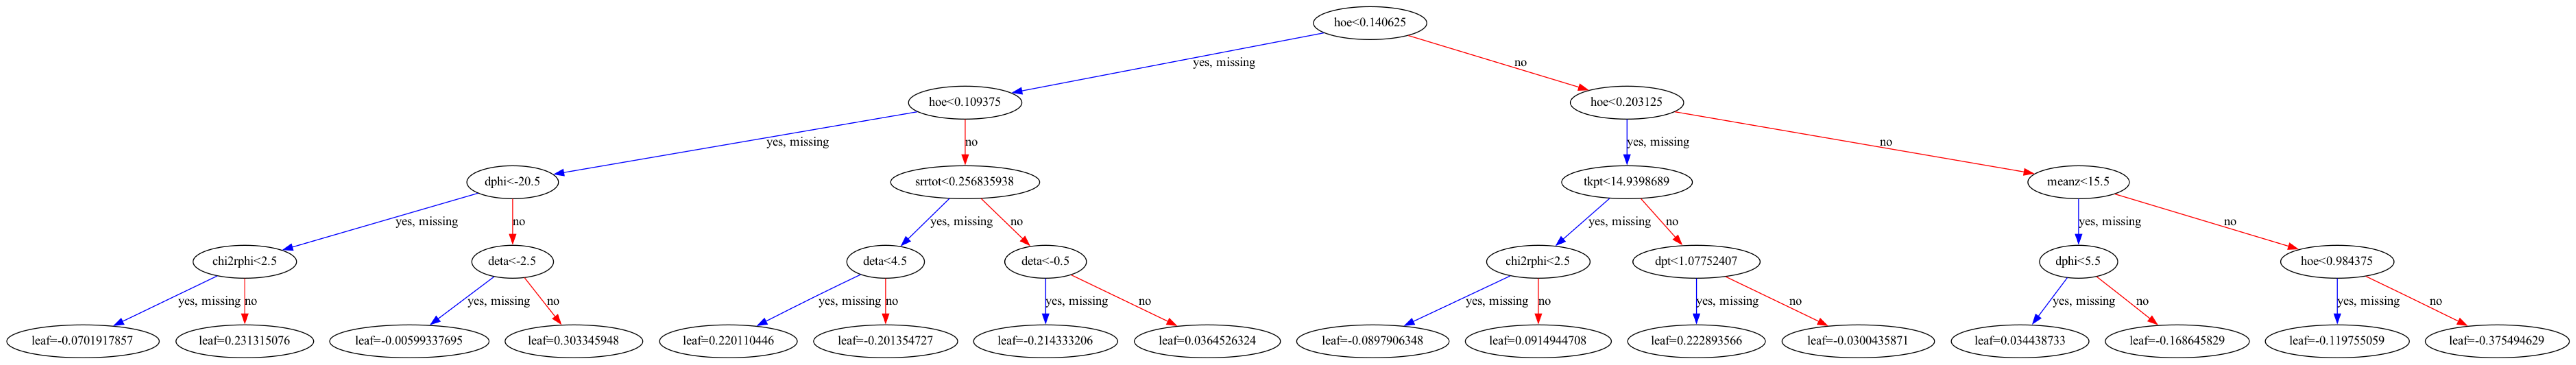

In [116]:
fig, ax = plt.subplots(figsize=(100,50))

plot_tree(model_test[9], ax=ax)


<Axes: >

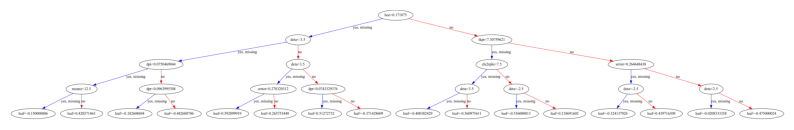

In [117]:
plot_tree(model)

<Axes: >

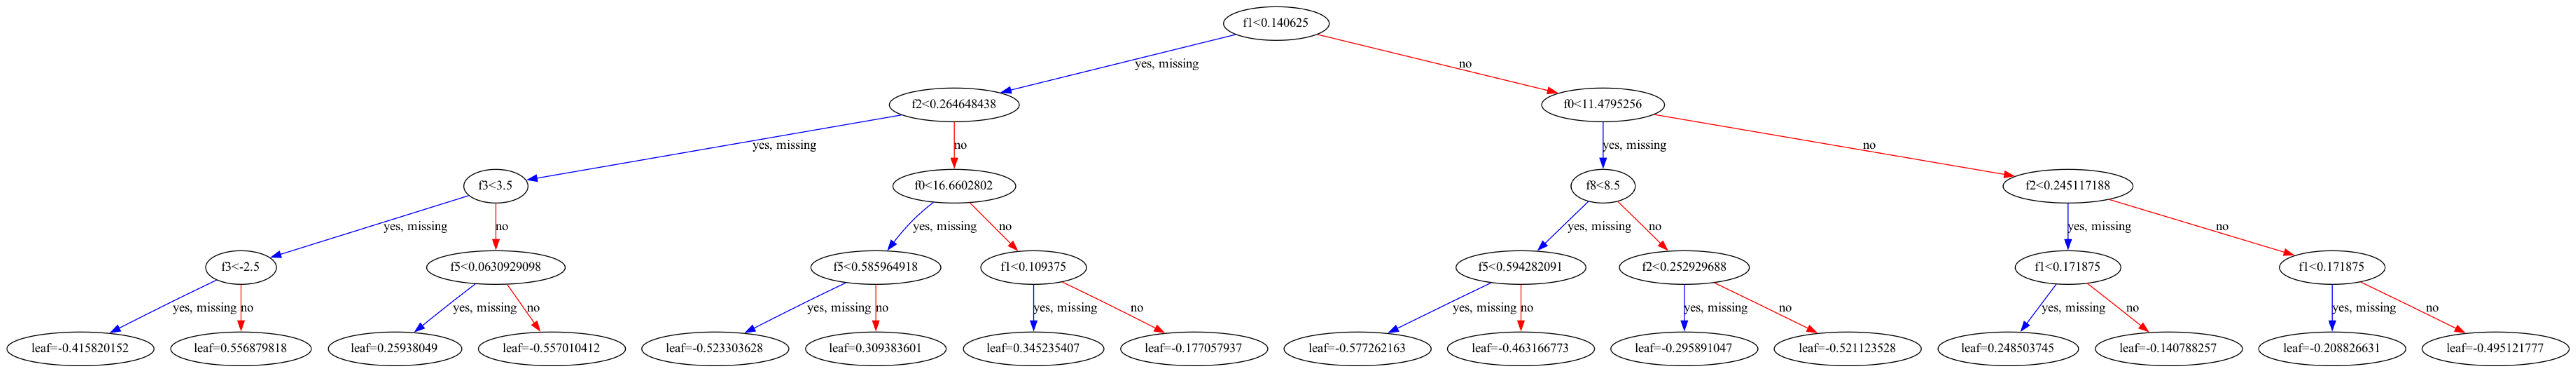

In [118]:

fig, ax = plt.subplots(figsize=(100,50))

plot_tree(pm_model, ax=ax)


In [119]:
dump = model.get_dump()
len(dump)

10

In [120]:
dump = model_test.get_dump()
len(dump)

10

In [121]:
dump = pm_model.get_dump()
print(len(dump))
print(dump[0])

10
0:[f1<0.140625] yes=1,no=2,missing=1
	1:[f2<0.264648438] yes=3,no=4,missing=3
		3:[f3<3.5] yes=7,no=8,missing=7
			7:[f3<-2.5] yes=15,no=16,missing=15
				15:leaf=-0.415820152
				16:leaf=0.556879818
			8:[f5<0.0630929098] yes=17,no=18,missing=17
				17:leaf=0.25938049
				18:leaf=-0.557010412
		4:[f0<16.6602802] yes=9,no=10,missing=9
			9:[f5<0.585964918] yes=19,no=20,missing=19
				19:leaf=-0.523303628
				20:leaf=0.309383601
			10:[f1<0.109375] yes=21,no=22,missing=21
				21:leaf=0.345235407
				22:leaf=-0.177057937
	2:[f0<11.4795256] yes=5,no=6,missing=5
		5:[f8<8.5] yes=11,no=12,missing=11
			11:[f5<0.594282091] yes=23,no=24,missing=23
				23:leaf=-0.577262163
				24:leaf=-0.463166773
			12:[f2<0.252929688] yes=25,no=26,missing=25
				25:leaf=-0.295891047
				26:leaf=-0.521123528
		6:[f2<0.245117188] yes=13,no=14,missing=13
			13:[f1<0.171875] yes=27,no=28,missing=27
				27:leaf=0.248503745
				28:leaf=-0.140788257
			14:[f1<0.171875] yes=29,no=30,missing=29
				29:leaf=-0.2088

Text(0, 1, 'Feature')

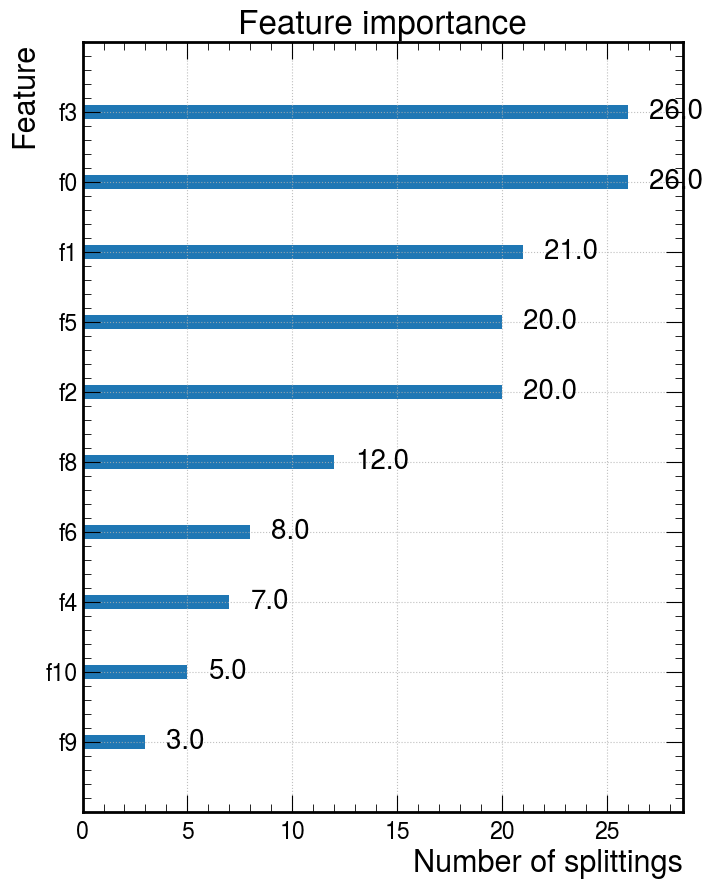

In [122]:
# Feature importance: number of splittings
xg.plot_importance( pm_model)
plt.gcf().subplots_adjust( left = 0.3 )
plt.grid(True)
plt.xlabel( 'Number of splittings', fontsize = 22 )
plt.ylabel( 'Feature', fontsize = 22 )
# plt.savefig( '%s/BDT_%s/feature_importance_egid_split_%s_%s_%s_%s.pdf'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.savefig( '%s/BDT_%s/feature_importance_egid_split_%s_%s_%s_%s.png'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.clf()


Text(0, 1, 'Feature')

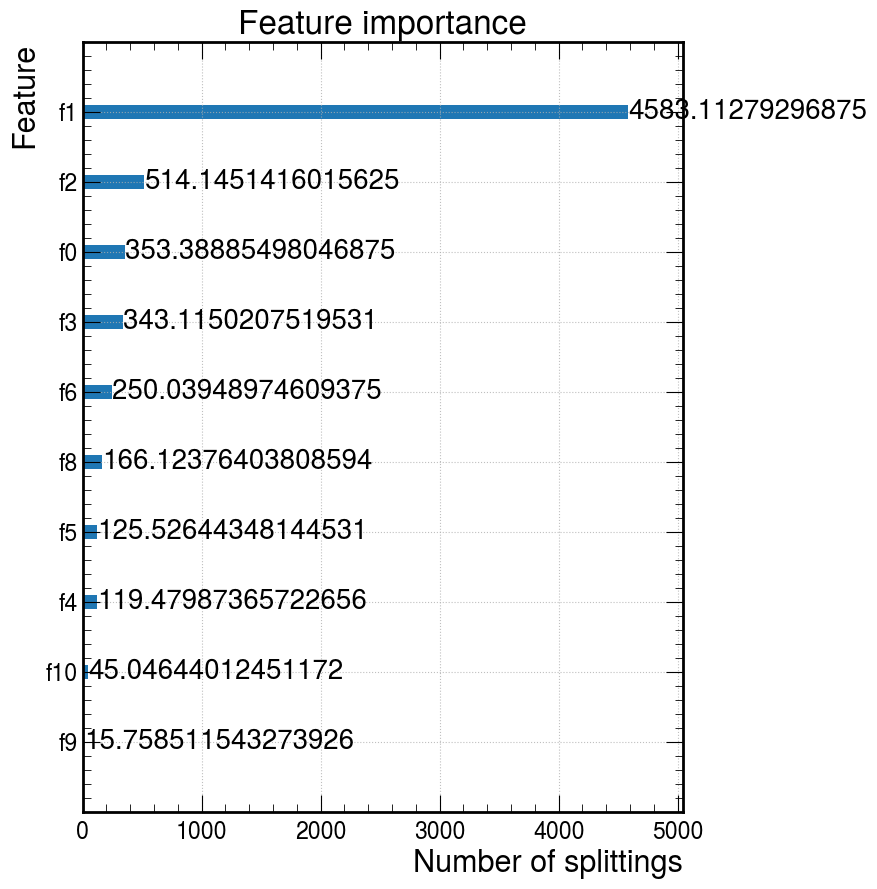

In [123]:
# Feature importance: gains
xg.plot_importance( pm_model , importance_type="gain")
plt.gcf().subplots_adjust( left = 0.3 )
plt.grid(True)
plt.xlabel( 'Number of splittings', fontsize = 22 )
plt.ylabel( 'Feature', fontsize = 22 )
# plt.savefig( '%s/BDT_%s/feature_importance_egid_gain_%s_%s_%s_%s.pdf'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.savefig( '%s/BDT_%s/feature_importance_egid_gain_%s_%s_%s_%s.png'%(out,bdt_name,bdt_name,opt.clusteringAlgo,reg,opt.ptBin ))
# plt.clf()


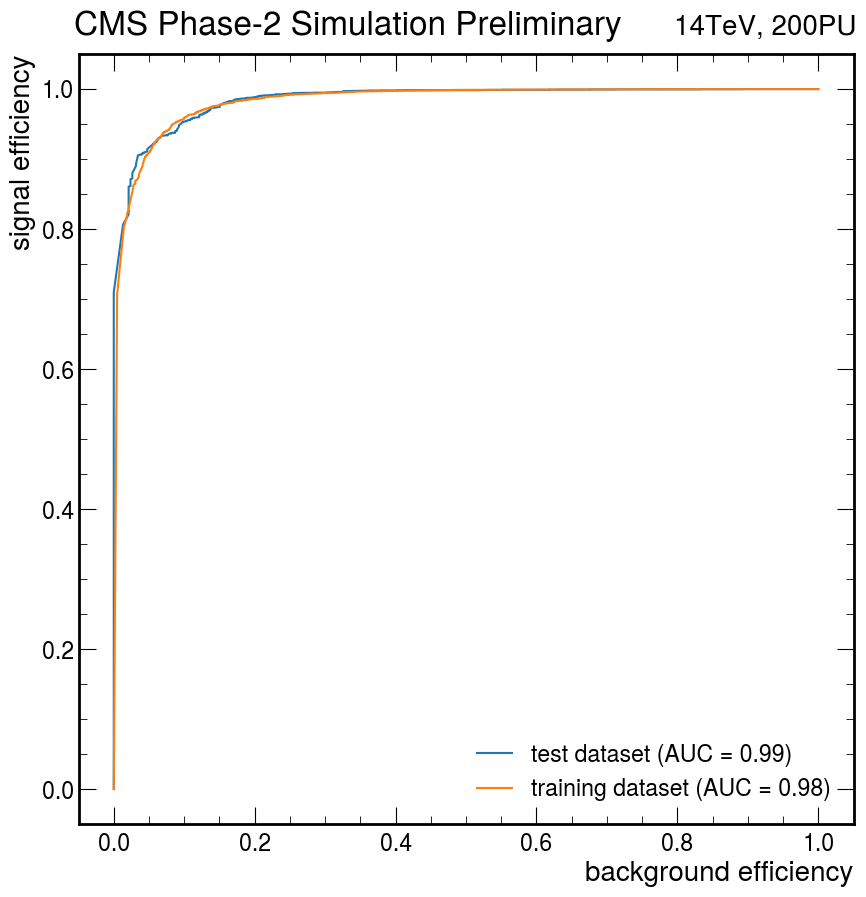

In [124]:
fig, ax = plt.subplots()
fig.text(0.12, 0.9, 'CMS Phase-2 Simulation Preliminary',fontsize='large')
fig.text(0.72, 0.9, '14TeV, 200PU',figure=fig)


egid_train_predy = model_test.predict( train_matrix )
egid_test_predy = model_test.predict( test_matrix )
RocCurveDisplay.from_predictions(egid_test_y, egid_test_predy, pos_label=1, ax=ax, name='test dataset')
RocCurveDisplay.from_predictions(egid_train_y, egid_train_predy, pos_label=1, ax=ax, name='training dataset')
ax.set_xlabel('background efficiency')
ax.set_ylabel('signal efficiency')

fig.savefig('composite_roc.pdf')

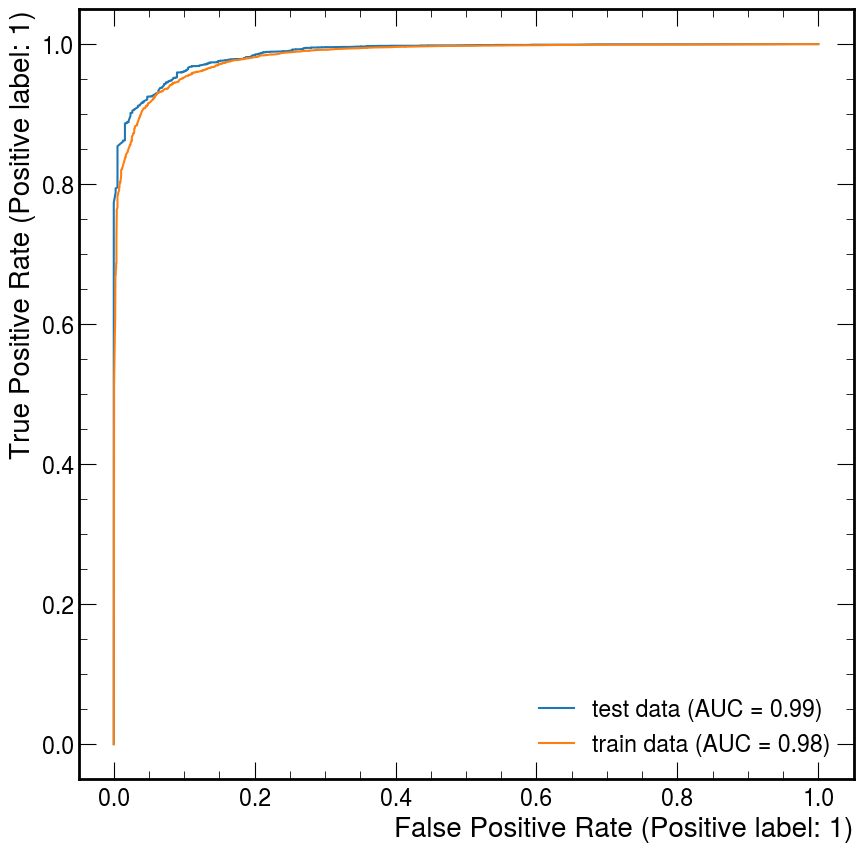

In [125]:
fig, ax = plt.subplots()

egid_train_predy = pm_model.predict( train_matrix )
egid_test_predy = pm_model.predict( test_matrix )
RocCurveDisplay.from_predictions(egid_test_y, egid_test_predy, pos_label=1, ax=ax, name='test data')
RocCurveDisplay.from_predictions(egid_train_y, egid_train_predy, pos_label=1, ax=ax, name='train data')



In [126]:
# egid_test_y = 
fpr, tpr, thresholds = roc_curve(egid_test_y, egid_test_predy)
auc = roc_auc_score(egid_test_y, egid_test_predy)
# print(tpr)
# print(auc)


wp_thr = {}
for wp in working_points: 
    idx = np.abs(tpr-wp).argmin()
    print(f'WP eff_s: {wp}, thr: {thresholds[idx]:0,.2f} ({tmva2xgb(pm_wps[wp][0]):0,.2f}) eff_b: {fpr[idx]:0,.2f} ({pm_wps[wp][1]:0,.2f}) ')
    wp_thr[wp] = thresholds[idx]


for wp in [0.955, 0.900]:
    thr = wp_thr[wp]
    print(f'---- WP eff: {wp}, threshold: {thr:0,.4f}' )
    class_pred = egid_test_predy > thr
    print('Accuracy score is: ',accuracy_score(egid_test_y, class_pred) * 100)
    print(classification_report(egid_test_y, class_pred))

    test_df.loc[: , f'pm_pred_wp{wp}'] = class_pred
# class_pred = egid_test_predy > wp_thr[0.900]
# print('Accuracy score is: ',accuracy_score(egid_test_y, class_pred) * 100)
# print(classification_report(egid_test_y, class_pred))

WP eff_s: 0.995, thr: 0.10 (0.09) eff_b: 0.28 (0.35) 
WP eff_s: 0.98, thr: 0.18 (0.18) eff_b: 0.18 (0.19) 
WP eff_s: 0.975, thr: 0.22 (0.22) eff_b: 0.15 (0.16) 
WP eff_s: 0.97, thr: 0.25 (0.25) eff_b: 0.12 (0.14) 
WP eff_s: 0.965, thr: 0.28 (0.28) eff_b: 0.11 (0.13) 
WP eff_s: 0.96, thr: 0.31 (0.30) eff_b: 0.09 (0.11) 
WP eff_s: 0.955, thr: 0.32 (0.32) eff_b: 0.09 (0.10) 
WP eff_s: 0.95, thr: 0.34 (0.34) eff_b: 0.08 (0.09) 
WP eff_s: 0.94, thr: 0.38 (0.38) eff_b: 0.07 (0.08) 
WP eff_s: 0.93, thr: 0.43 (0.43) eff_b: 0.06 (0.06) 
WP eff_s: 0.92, thr: 0.46 (0.46) eff_b: 0.05 (0.05) 
WP eff_s: 0.91, thr: 0.52 (0.52) eff_b: 0.03 (0.04) 
WP eff_s: 0.9, thr: 0.55 (0.55) eff_b: 0.02 (0.04) 
WP eff_s: 0.8, thr: 0.85 (0.84) eff_b: 0.01 (0.01) 
WP eff_s: 0.7, thr: 0.94 (0.94) eff_b: 0.00 (0.00) 
WP eff_s: 0.65, thr: 0.95 (0.95) eff_b: 0.00 (0.00) 
WP eff_s: 0.6, thr: 0.96 (0.96) eff_b: 0.00 (0.00) 
WP eff_s: 0.55, thr: 0.97 (0.97) eff_b: 0.00 (0.00) 
WP eff_s: 0.5, thr: 0.97 (0.97) eff_b: 0.00 (0

In [127]:
test_df.columns

Index(['pt', 'eta', 'phi', 'chi2rz', 'chi2rphi', 'ch2bend', 'nstubs', 'tkpt',
       'dphi', 'deta', 'dpt', 'srrtot', 'hoe', 'meanz', 'compBDTScore',
       'gen_pt', 'gen_eta', 'gen_phi', 'gen_dz', 'cat', 'npt', 'neta', 'nphi',
       'ncompChi2RZ', 'ncompChi2RPhi', 'ncompChi2Bend', 'ncompNstubs', 'ntkPt',
       'ncompDphi', 'ncompDeta', 'ncompDpt', 'ncompSrrtot', 'ncompHoe',
       'ncompMeanz', 'encoded_class', 'pred_wp0.955', 'pred_wp0.9',
       'pm_pred_wp0.955', 'pm_pred_wp0.9'],
      dtype='object')

In [128]:
test_df[test_df['pm_pred_wp0.955'] != test_df['pred_wp0.955']][['pt', 'eta', 'phi', 'cat', 'pm_pred_wp0.955', 'pred_wp0.955']]

pt       eta       phi         cat  pm_pred_wp0.955  pred_wp0.955
66098  24.50  1.570796  2.430371  background            False          True
33219  21.25  1.562070  2.556907      signal             True         False
15534  66.50 -1.994039 -1.994039      signal             True         False
39177  18.75  2.382375  0.388336      signal            False          True
28332  36.50 -2.286381  0.113446      signal             True         False
...      ...       ...       ...         ...              ...           ...
3034   22.50 -2.303835  2.487094      signal            False          True
41576  61.00  1.758419 -0.157080      signal             True         False
36419  16.50  1.994039 -1.361357      signal             True         False
34521  62.50 -1.592613  0.061087      signal             True         False
25183  26.50 -2.330014 -1.954769      signal            False          True

[112 rows x 6 columns]

In [129]:
test_df.shape


(6332, 39)

In [130]:
test_df.shape
test_df[test_df['pm_pred_wp0.9'] != test_df['pred_wp0.9']][['pt', 'eta', 'phi', 'cat', 'pm_pred_wp0.9', 'pred_wp0.9']]

pt       eta       phi         cat  pm_pred_wp0.9  pred_wp0.9
48693  78.25 -1.662426  0.218166  background          False        True
13957  22.25 -2.081305 -2.574361      signal           True       False
38153  17.25 -1.845686  1.308997      signal           True       False
34701  22.75 -1.601340  1.701696      signal           True       False
12785  24.25  2.242748 -2.953970      signal           True       False
...      ...       ...       ...         ...            ...         ...
25565  36.00  1.727876 -1.335177      signal           True       False
22108  21.00 -1.815142 -2.783800      signal          False        True
34521  62.50 -1.592613  0.061087      signal           True       False
32009  33.00 -2.203478 -1.653699      signal           True       False
6288   28.50 -2.050762  0.109083      signal          False        True

[223 rows x 6 columns]

In [131]:
#FIXME:

train_df.loc[:, 'pred'] = egid_train_predy
train_df.loc[:, 'pred_logit'] = logit(egid_train_predy)




In [132]:
test_df.loc[:, 'pred'] = egid_test_predy
test_df.loc[:, 'pred_logit'] = logit(egid_test_predy)


In [133]:
np.min(train_df.pred_logit)

-4.0763254

In [134]:
tran_df_sig = train_df[train_df.cat == 'signal']
tran_df_bkg = train_df[train_df.cat == 'background']

In [135]:
h_pred_sig = ROOT.TH1F('h_pred_sig', 'signal', 20, 0, 1.)
h_pred_bkg = ROOT.TH1F('h_pred_bkg', 'signal', 20, 0, 1.)

h_predLogit_sig = ROOT.TH1F('h_predLogit_sig', 'signal', 50, -4, 4)
h_predLogit_bkg = ROOT.TH1F('h_predLogit_bkg', 'signal', 50, -4, 4)


In [136]:
ROOT.fill_1Dhist(h_pred_sig, tran_df_sig.pred.values)
ROOT.fill_1Dhist(h_pred_bkg, tran_df_bkg.pred.values)
ROOT.fill_1Dhist(h_predLogit_sig, tran_df_sig.pred_logit.values)
ROOT.fill_1Dhist(h_predLogit_bkg, tran_df_bkg.pred_logit.values)


In [137]:
smps = ['ele-menu']
newconfig=rleg_config
newconfig.marker_size = 1
newconfig.legend_size=(0.3, 0.3)
newconfig.legend_position=(0.3, 0.15)
newconfig.marker_styles.append(10)


In [184]:

class DPSColorPalette(ColorPalette):
    def __init__(self):  
        ColorPalette.__init__(self)
        self.color_map = {
            # 'Sta': ROOT.kGreen+1,
            'Sta': ROOT.kViolet-7,
            'TkEm': ROOT.kPink-9,
            'TkEle': ROOT.kBlue+2,
            'IsoTkEle': ROOT.kAzure+1,
            'EllTkEle': ROOT.kViolet+5,
            'sig': ROOT.kAzure+5,
            'bkg': ROOT.kOrange+1,
  
        }

    def keys(self):
        return self.color_map.keys()
        
    def setPalette(self, keys):
        self.color_base = []
        for key in keys:
            self.color_base.append(self.color_map[key])

            
dpsconfig = DrawConfig()
dpsconfig.marker_size = 1
dpsconfig.legend_size=(0.3, 0.3)
dpsconfig.legend_position=(0.3, 0.15)
# newconfig.marker_styles.append(10)
dpsconfig.colors = DPSColorPalette()
dpsconfig.additional_text.append(
    (0.13, 0.91, "#scale[1.5]{CMS} #scale[1.]{Phase-2 Simulation Preliminary}"))
dpsconfig.additional_text.append(
    (0.69, 0.91, "14TeV, 200 PU"))




In [114]:
import os
import webpager as wp

wc = wp.WebPageCreator(
    topic_dir='model', 
    project_dir='V91-CMSSW12.5-DPS', 
#     project_dir='test', 
    base_dir='/Users/cerminar/CERNbox/www/plots/', 
    tmp_dir=os.environ['TMPDIR'])

In [187]:
dm = DrawMachine(dpsconfig)
dm.config.legend_position = (0.4,0.6)
dm.config.legend_size=(0.3, 0.15)

dm.addHistos([h_pred_sig, h_pred_bkg], labels=['signal', 'background'])

dm.config.colors.setPalette(['sig','bkg'])

dm.draw(text='Composite-ID candidates, 1.52 < |#eta| #leq 2.4', 
        x_min=0, x_max=1, 
#         y_min=0.0, y_max=1.1, 
#         h_lines=[1.0, 0.9],
#         v_lines=[1.5],
        do_ratio=False,
#         y_min_ratio=0.8,
#         y_max_ratio=1.2,
        y_axis_label='a.u.',
        x_axis_label='BDT score',
         options='hist,M',
        y_log=True,
        norm=True
       )


# dm.legend.SetTextAlign(13)
# dm.legend.SetFillColor(0)
# # dm.legend.SetFillStyle(1001)
# dm.legend.SetBorderSize(0)
# dm.canvas.Draw()
# dm.write(name='eg_TDRvsSummer20_matchig_eff')

dm.toWeb(name='hCompBDT_score', page_creator=wc)



[WebPageCreator]***Warning: overwriting canvas: hCompBDT_score!


Info in <TCanvas::Print>: png file /var/folders/8z/0424tdz97zsc8klvdy6_xl5r0000gn/T/V91-CMSSW12.5-DPS/model/hCompBDT_score.png has been created
Info in <TCanvas::Print>: pdf file /var/folders/8z/0424tdz97zsc8klvdy6_xl5r0000gn/T/V91-CMSSW12.5-DPS/model/hCompBDT_score.pdf has been created


In [116]:
wc.publish()

Yes/No: yes


In [142]:
import hist
from hist import Hist

ax = hist.axis.Regular(10, 0, 10, flow=False, name="chi2bend")
cax = hist.axis.StrCategory(["signal", "background"], name="c")
full_hist = Hist(ax, cax, density=True)

full_hist.fill(chi2bend=train_valid_df[train_valid_df.cat == 'signal'].ch2bend, c="signal" )
full_hist.fill(chi2bend=train_valid_df[train_valid_df.cat == 'background'].ch2bend, c="background")


s = full_hist.stack("c")
s.plot()

TypeError: BaseHist.__init__() got an unexpected keyword argument 'density'

In [143]:
training_egid

NameError: name 'training_egid' is not defined

In [144]:
len(egid_train_predy)

35878

In [145]:
train_df['pred'] = egid_train_predy

In [146]:
h_sig = ROOT.TH1F('h_sig_score', 'h', 100, 0, 1)
h_bkg = ROOT.TH1F('h_sig_score', 'h', 100, 0, 1)


Warning in <TFile::Append>: Replacing existing TH1: h_sig_score (Potential memory leak).


In [147]:
xg.__version__

'1.7.5'

In [148]:
import os
os.environ["JSON_ROOT"] = "/Users/cerminar/Workspace/hgcal-analysis/py3/ak/ntuple-tools/src/json/include"


In [150]:
import conifer
cfg = conifer.backends.cpp.auto_config()
cfg['Precision'] = 'float'
model = conifer.model.load_model('../data/compositeID.json', new_config=cfg)
model.compile()


Exception: Can't import pybind11 bridge, is it compiled?

ld: warning: -undefined dynamic_lookup may not work with chained fixups


In [ ]:

import numpy as np
X = np.random.rand(100, model.n_features)
y = model.decision_function(X) # raw predictions like we use in HLS

from scipy.special import expit
p = expit(y) # for class probabilities